In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error



pd.set_option('display.max_columns', None)

## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Reading and Understanding the data

In [2]:
housing=pd.read_csv("./train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.shape

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Filter to show only columns with missing values
missing_values = housing.isnull().sum()
missing_values = missing_values[missing_values > 0]

print(missing_values)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [8]:
#checking for unique values in the dataset
housing.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

# Data Preparation

### Handling Null values

In [9]:
## Replacing missing values with the mean for LotFrontage and MasVnrArea
housing['LotFrontage'].fillna(housing['LotFrontage'].mean(), inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].mean(), inplace=True)

In [10]:
missing_values = housing.isnull().sum()
missing_values = missing_values[missing_values > 0]

print(missing_values)

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [11]:
## Handling NaN Values in categorical variables
housing['Alley'] = housing['Alley'].fillna('No_Alley_Access')
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')
housing['BsmtQual'] = housing['BsmtQual'].fillna('No_Basement')
housing['BsmtCond'] = housing['BsmtCond'].fillna('No_Basement')
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('No_Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('No_Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('No_Basement')
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No_Fire_Place')
housing['GarageType'] = housing['GarageType'].fillna('No_Garage')
housing['GarageFinish'] = housing['GarageFinish'].fillna('No_Garage')
housing['GarageQual'] = housing['GarageQual'].fillna('No_Garage')
housing['GarageCond'] = housing['GarageCond'].fillna('No_Garage')
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

housing['Electrical'] = housing['Electrical'].fillna("Other")
housing['PoolQC'] = housing['PoolQC'].fillna('No_Pool')
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')

housing['Fence'] = housing['Fence'].fillna('No_Fence')


In [12]:
housing['GarageYrBlt']=housing['GarageYrBlt'].astype(int)

In [13]:
housing.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [14]:
missing_values = housing.isnull().sum()
missing_values = missing_values[missing_values > 0]

print(missing_values)

Series([], dtype: int64)


In [15]:
## Convert below columns to 'object' type as these values are indicating as category.
housing[['MSSubClass', 'OverallQual', 'OverallCond','GarageYrBlt']] = housing[['MSSubClass', 'OverallQual', 'OverallCond','GarageYrBlt']].astype('object')

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [17]:
#dropping id column as it is not useful for analysis
housing = housing.drop(["Id"], axis=1)

In [18]:
#Feature Engineering

## Drop the two columns from which we created new one
housing['Age'] = housing['YrSold'] - housing['YearBuilt']
housing.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearRemo

Handled all the missing values in the dataset.

### Exploratory Data Analysis(EDA)

In [20]:
## extracting numerical columns
housing_num = housing.select_dtypes(include=['int64', 'float64'])
housing_num.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age
0,65.0,8450,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500,5
1,80.0,9600,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500,31
2,68.0,11250,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500,7
3,60.0,9550,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,140000,91
4,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,250000,8


In [21]:
## extracting categorical columns
housing_cat = housing.select_dtypes(include='object')
housing_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No_Fire_Place,Attchd,2003,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1,20,RL,Pave,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
2,60,RL,Pave,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
3,70,RL,Pave,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Abnorml
4,60,RL,Pave,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal


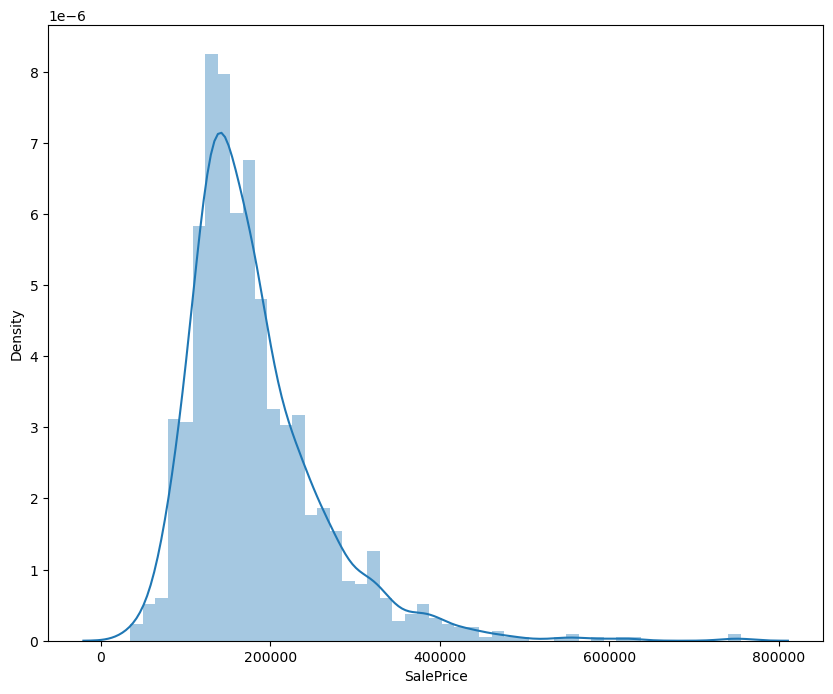

In [22]:
## Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.distplot(housing['SalePrice']);

In [23]:
## Log transform the target variable
housing['SalePrice'] = np.log(housing['SalePrice'])

In [24]:
housing.SalePrice

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

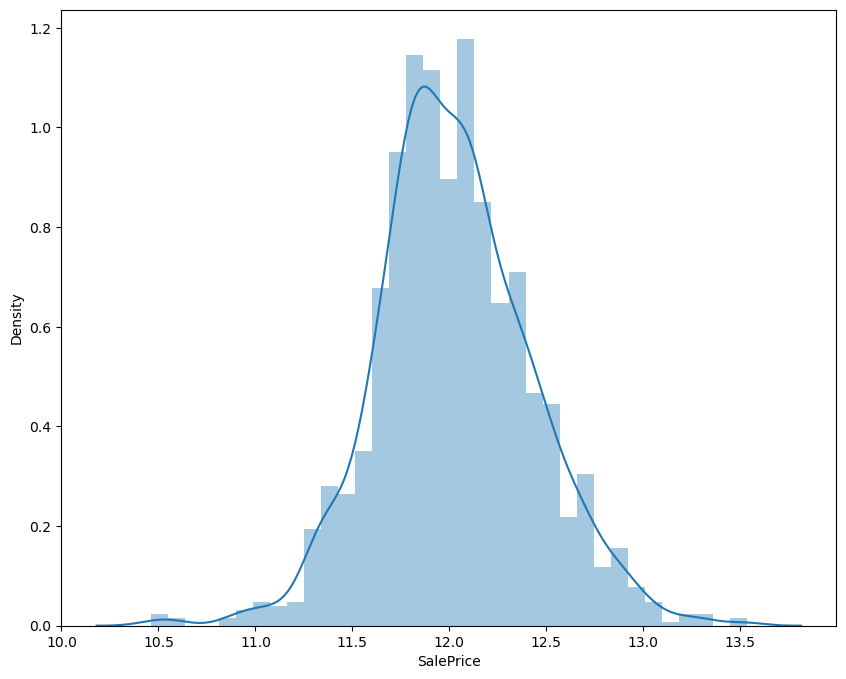

In [25]:
## Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.distplot(housing['SalePrice']);

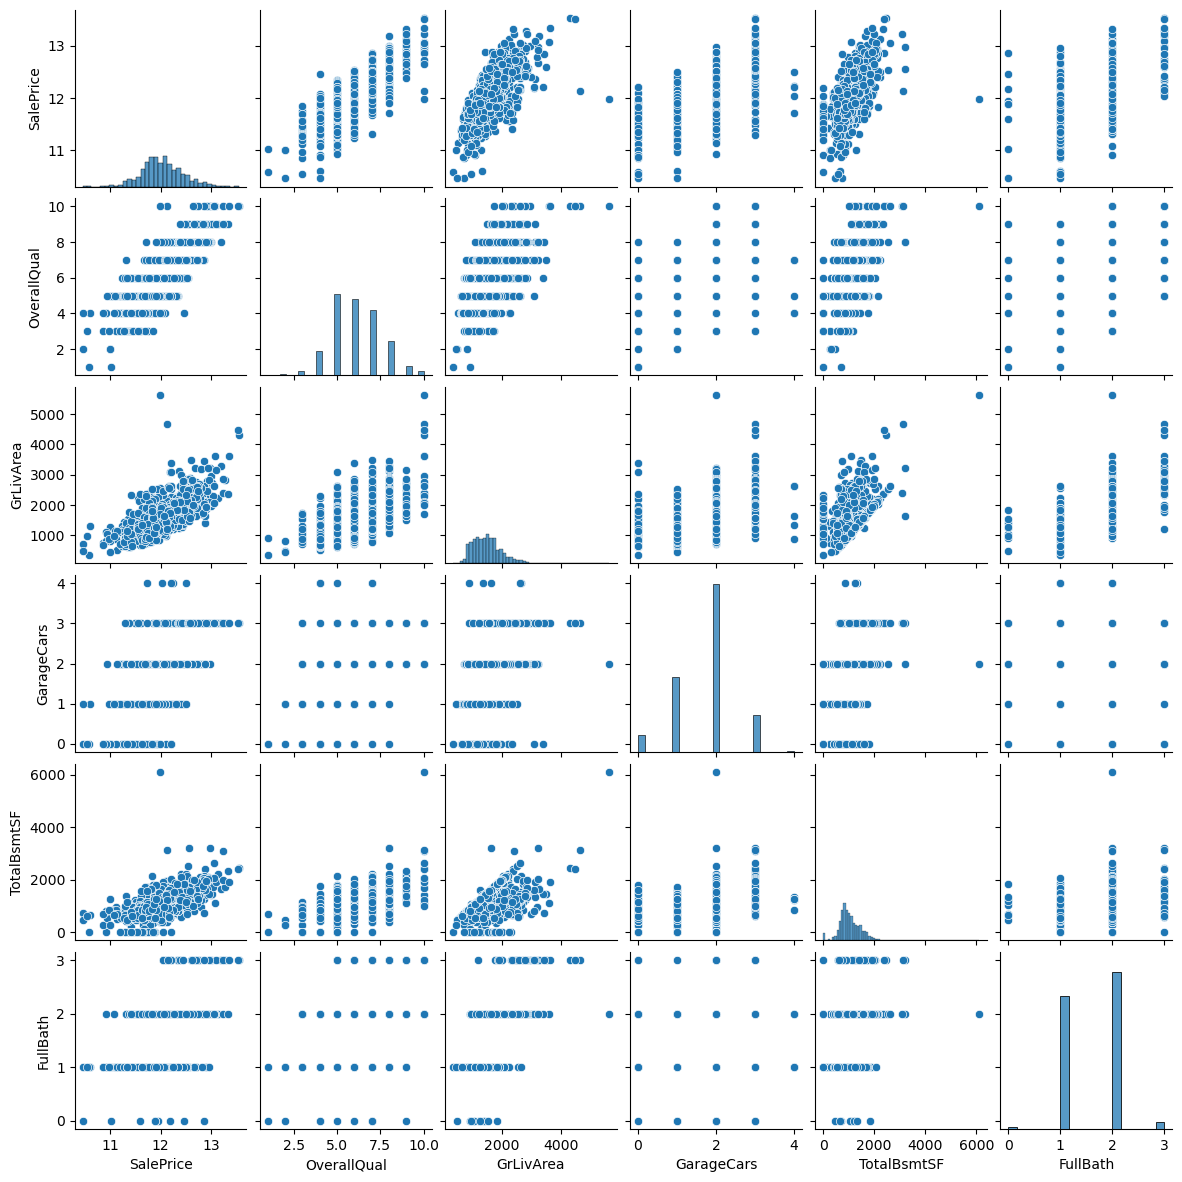

In [26]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(housing[cols],height = 2)
plt.show()


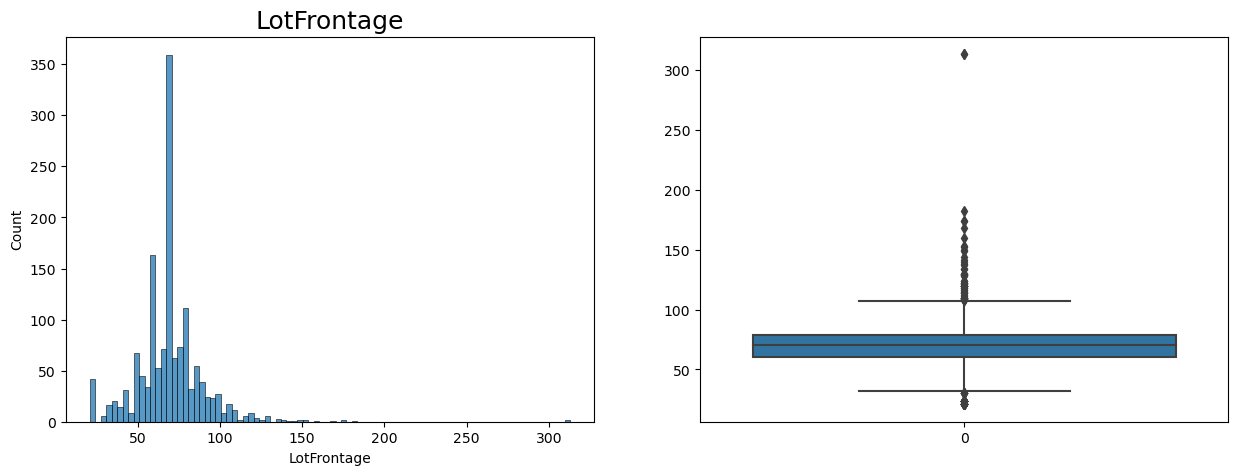

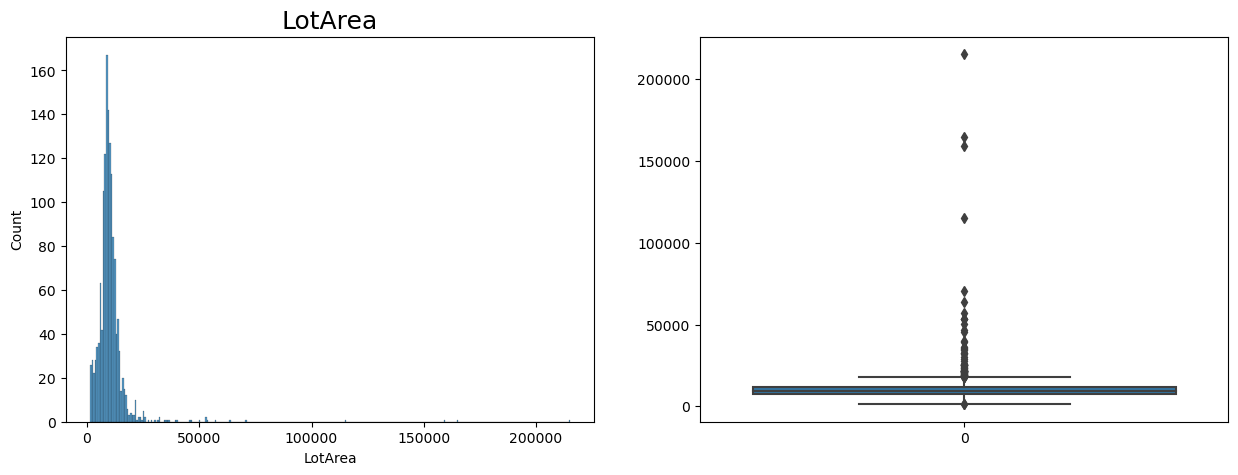

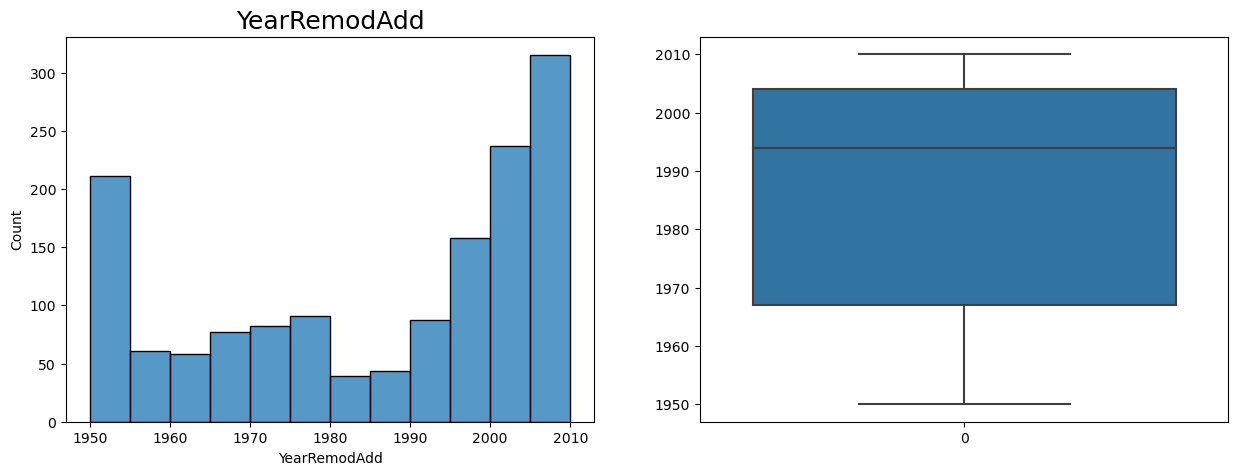

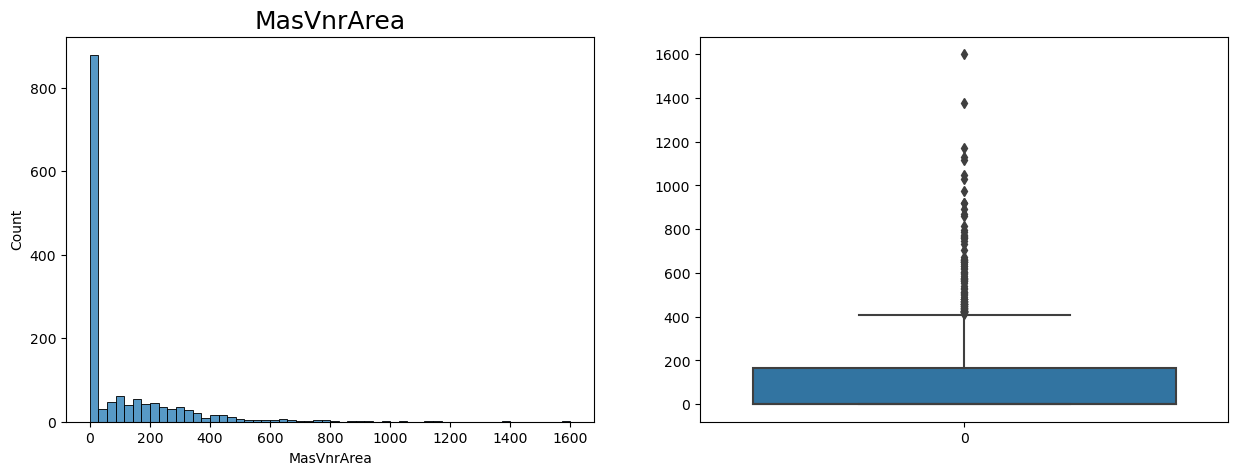

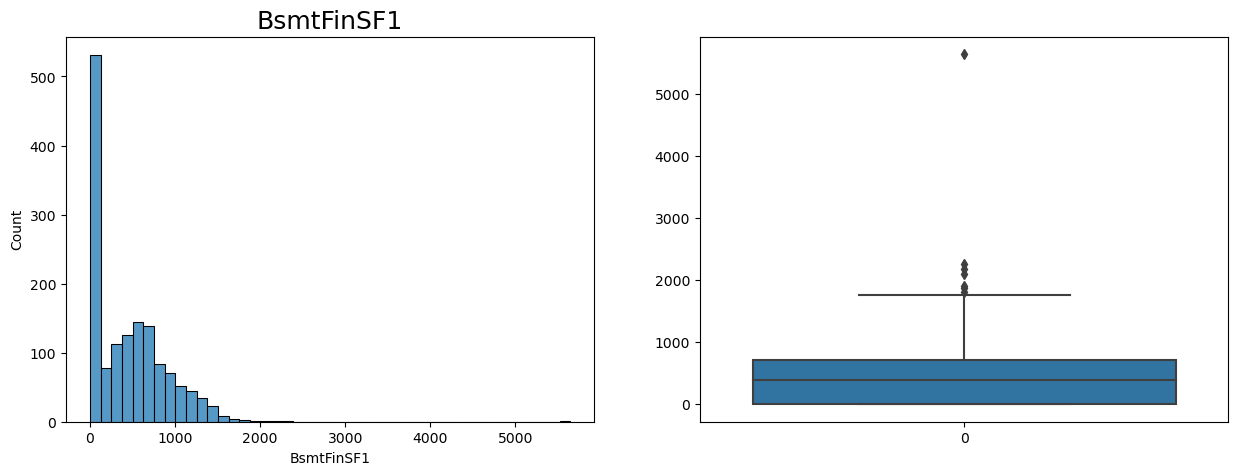

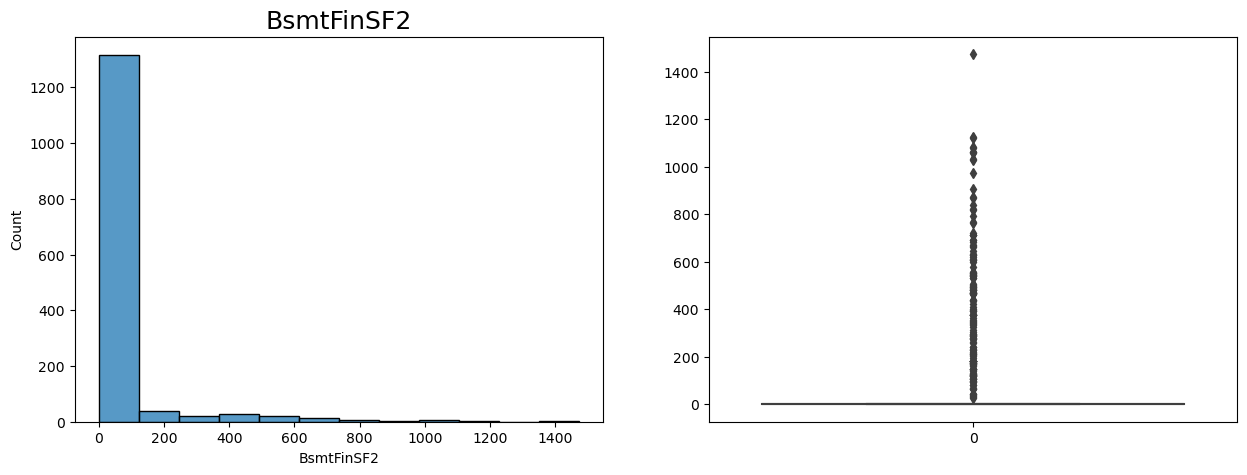

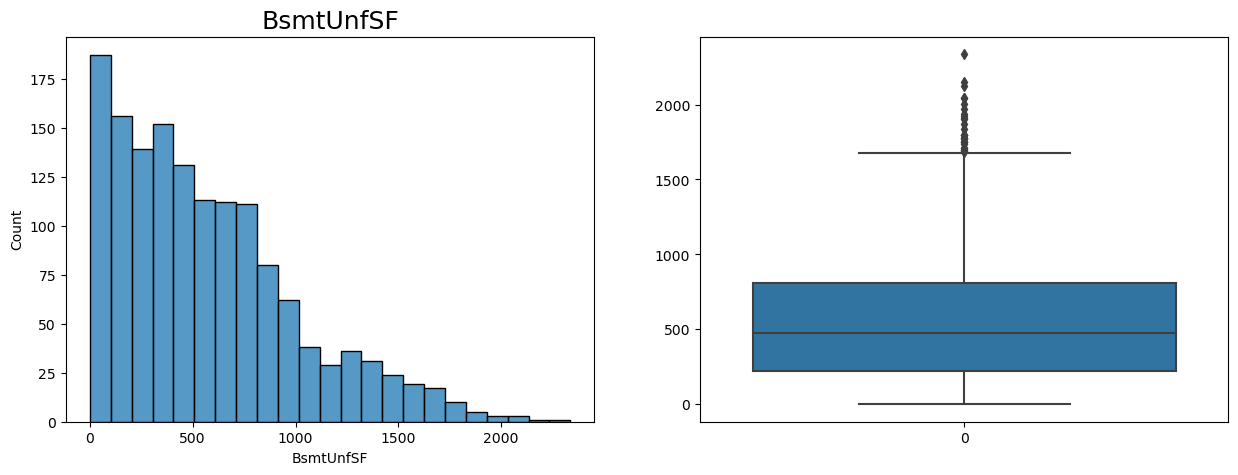

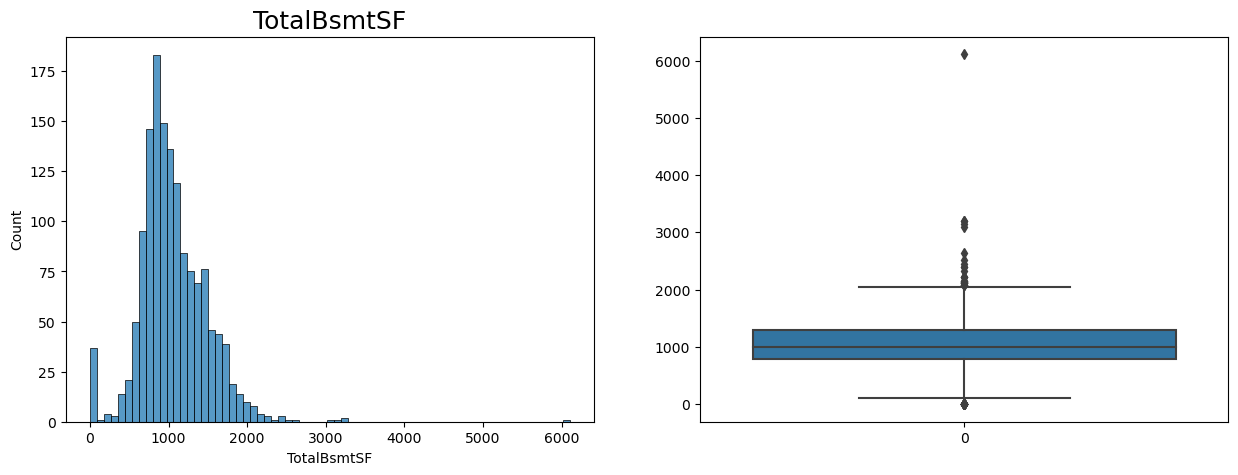

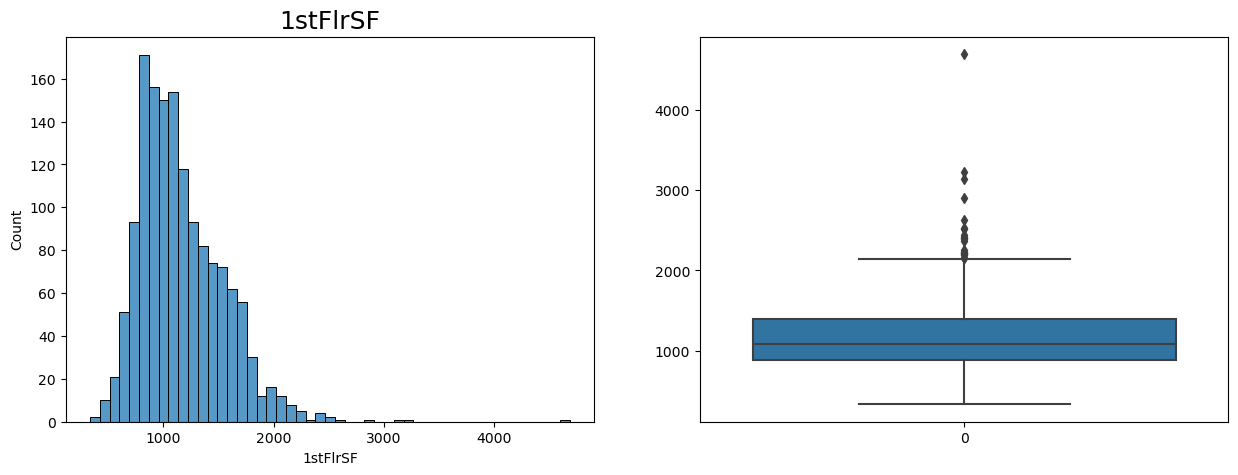

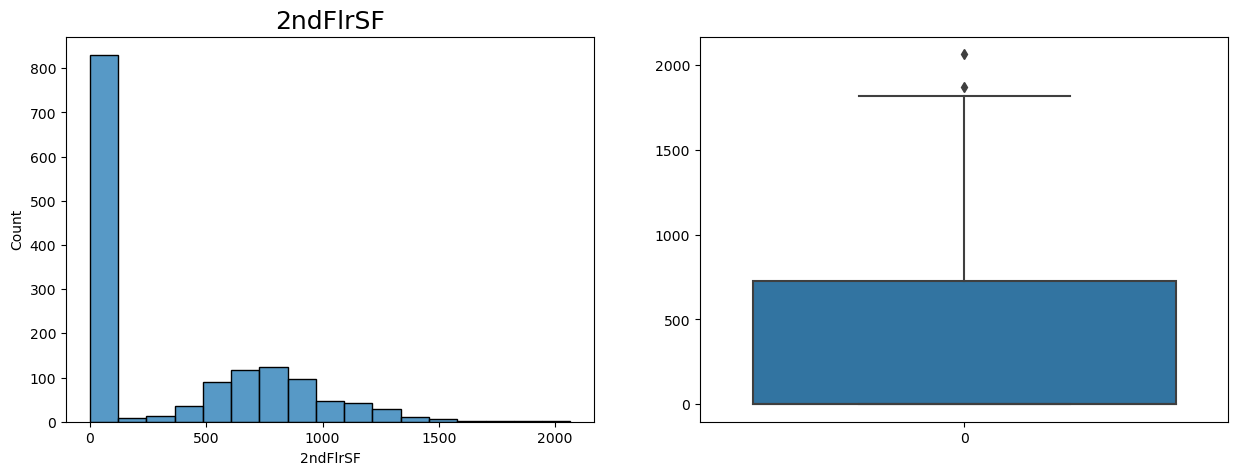

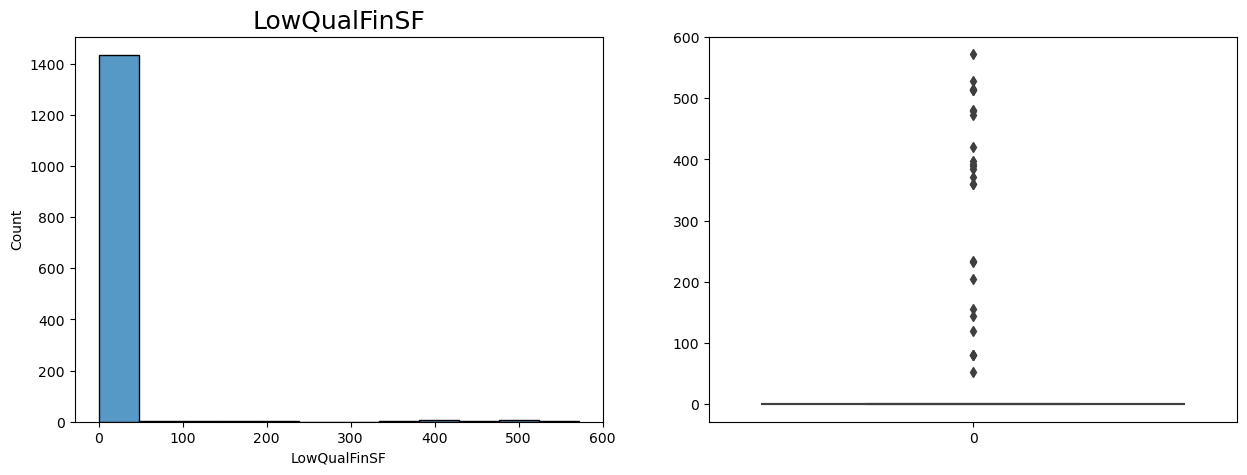

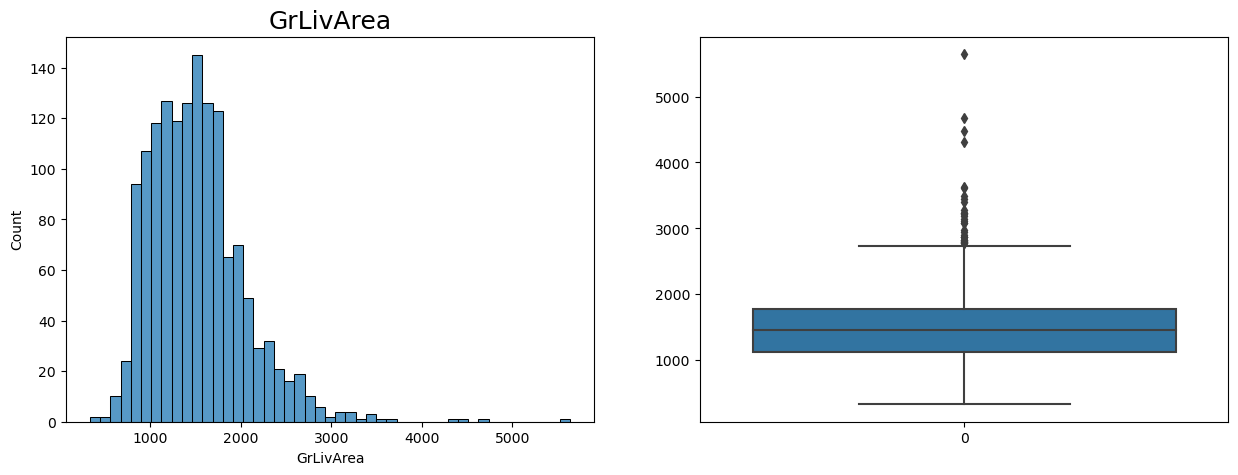

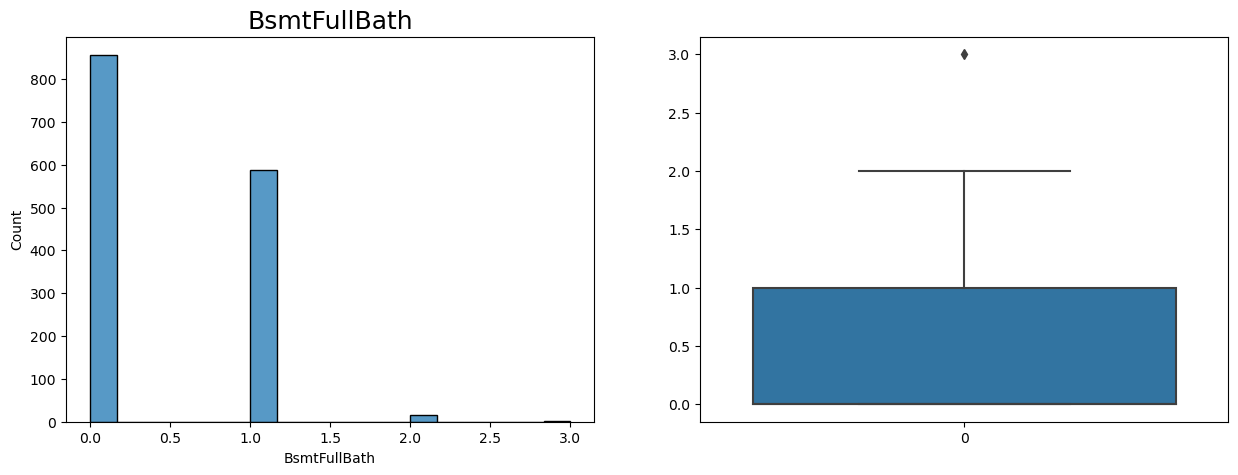

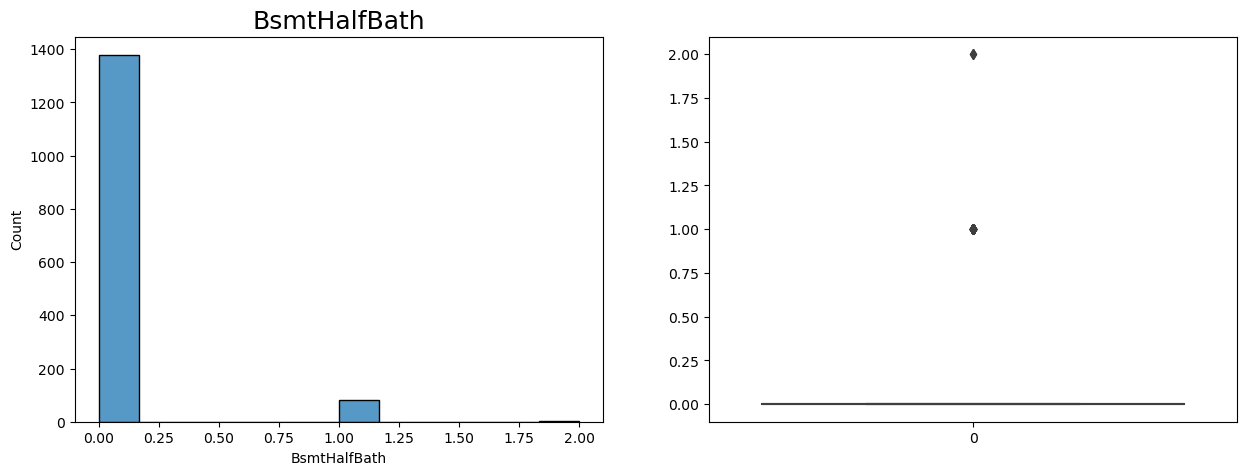

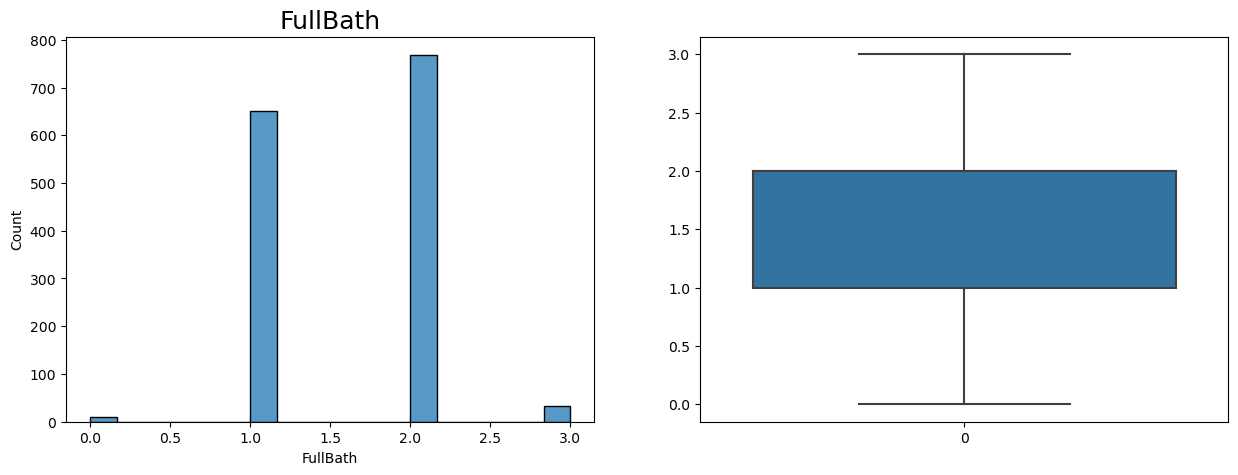

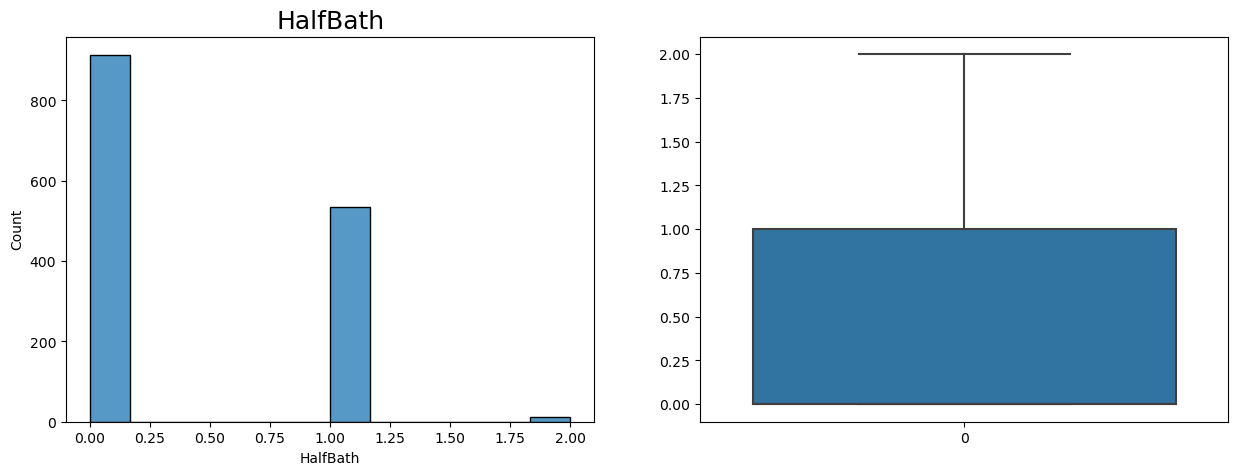

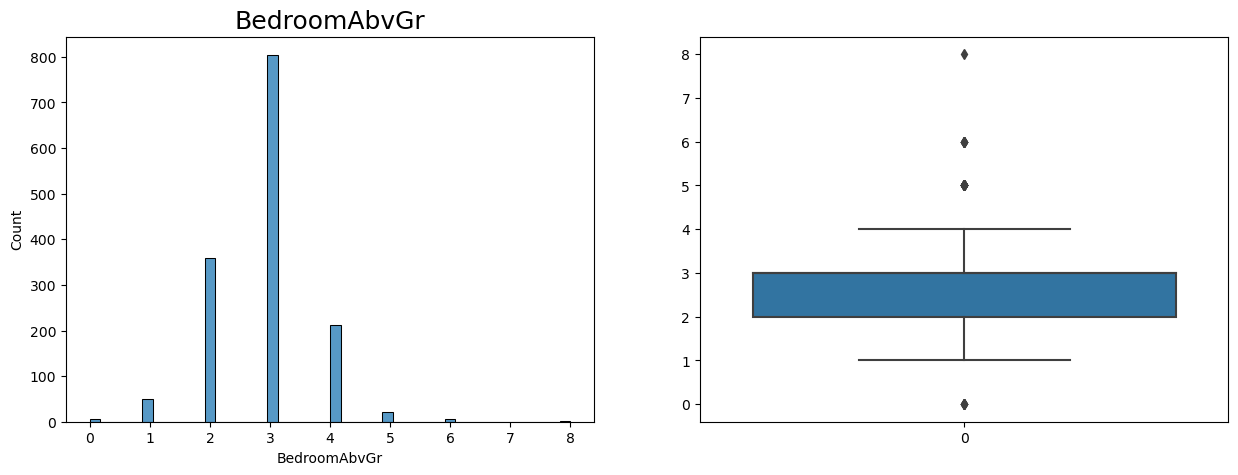

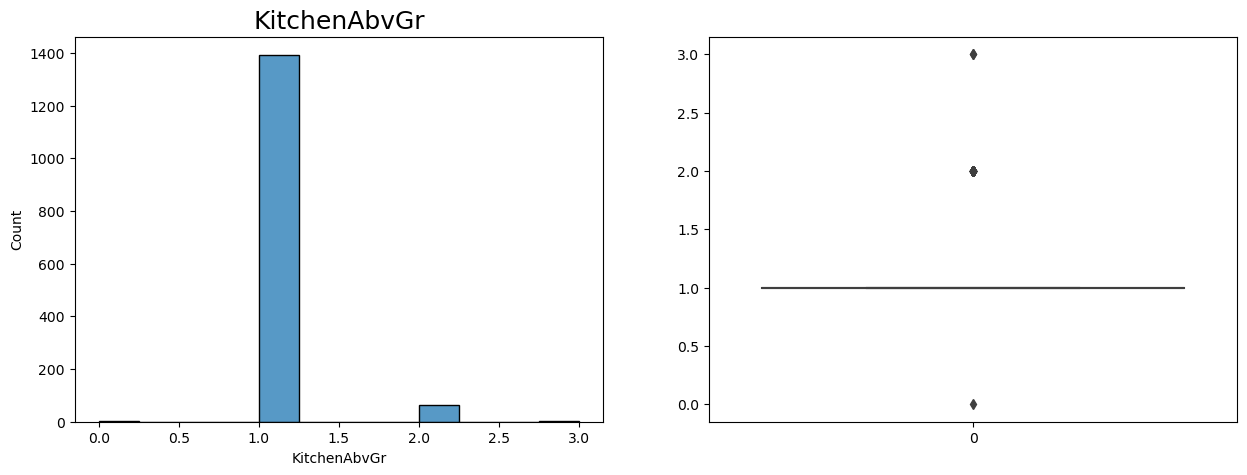

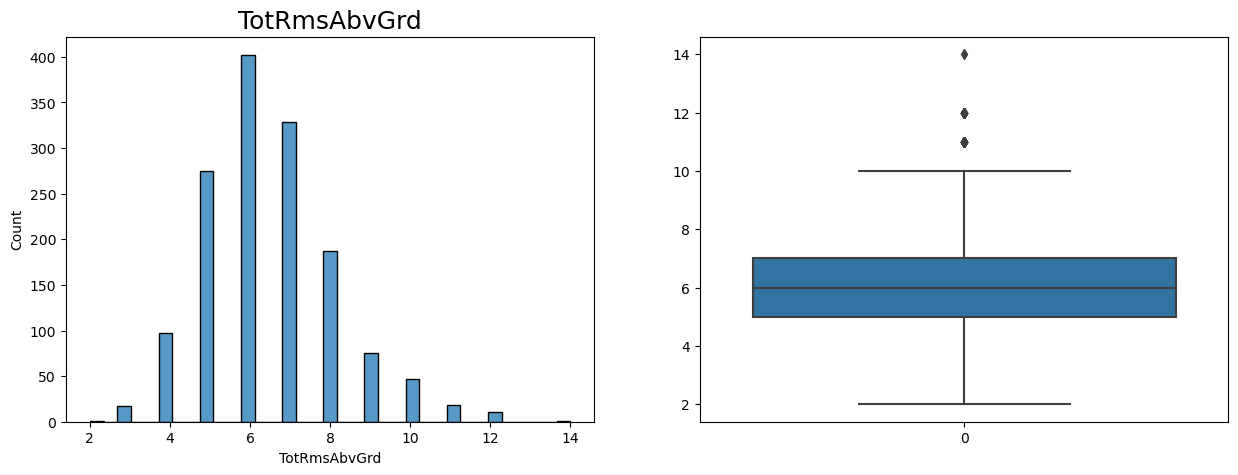

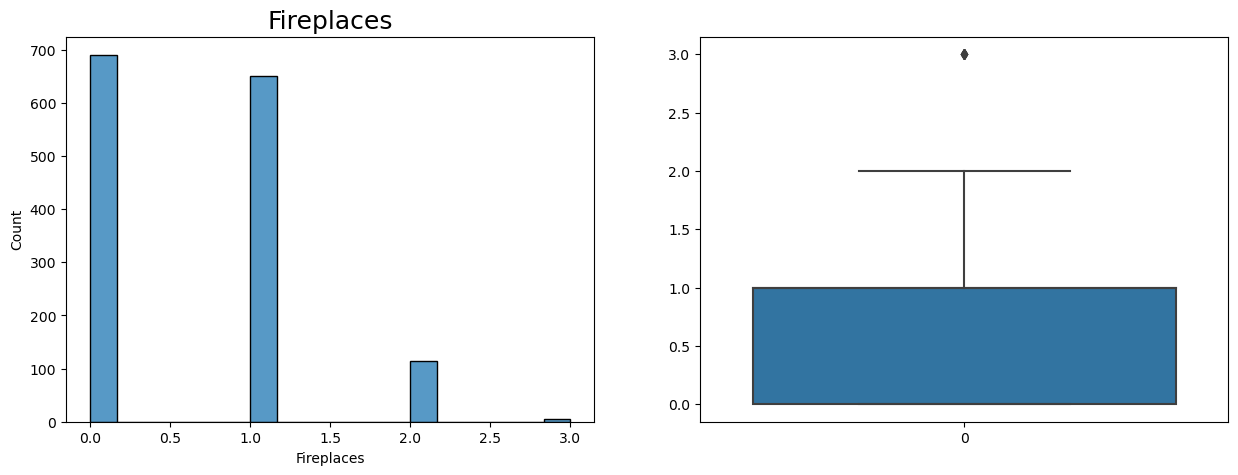

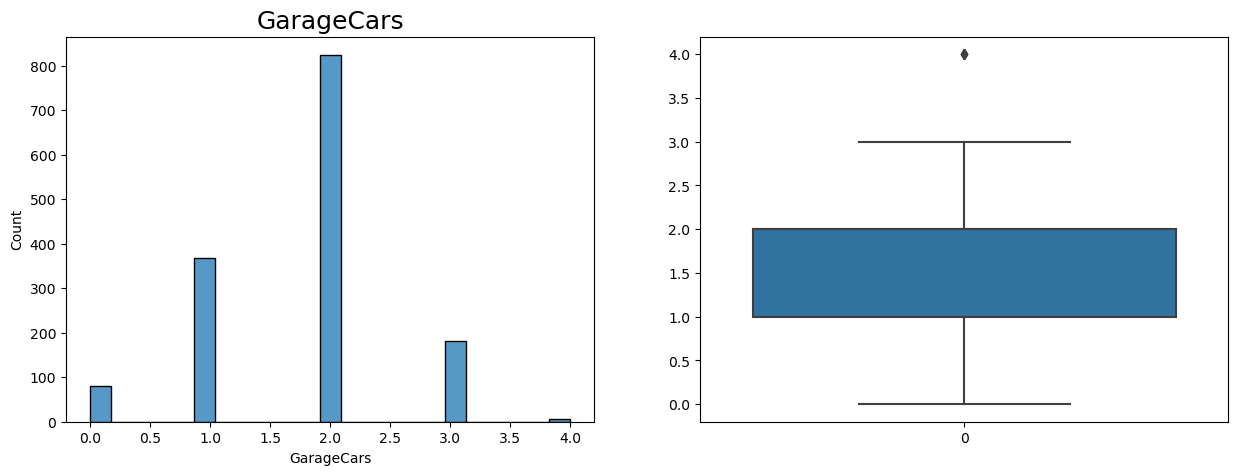

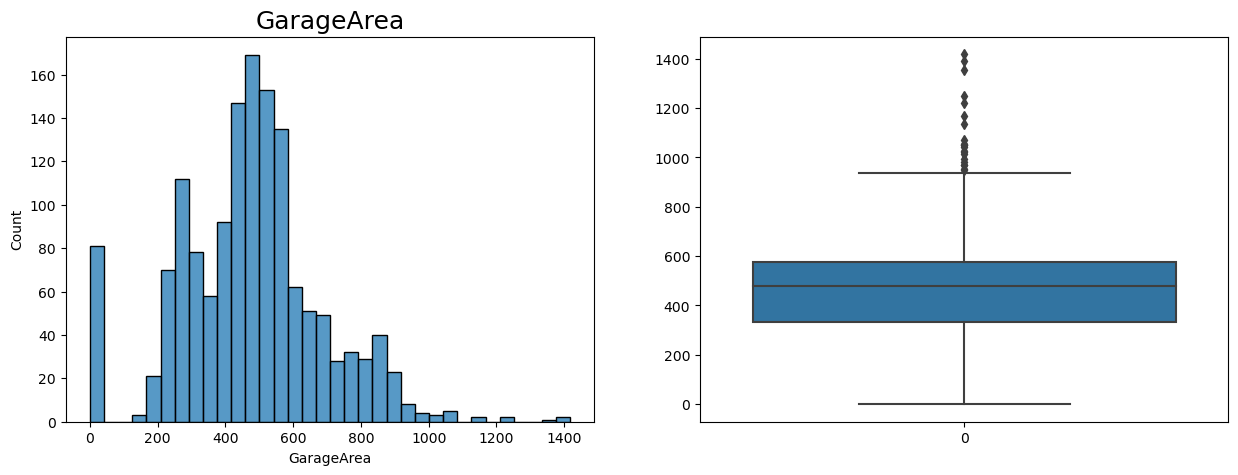

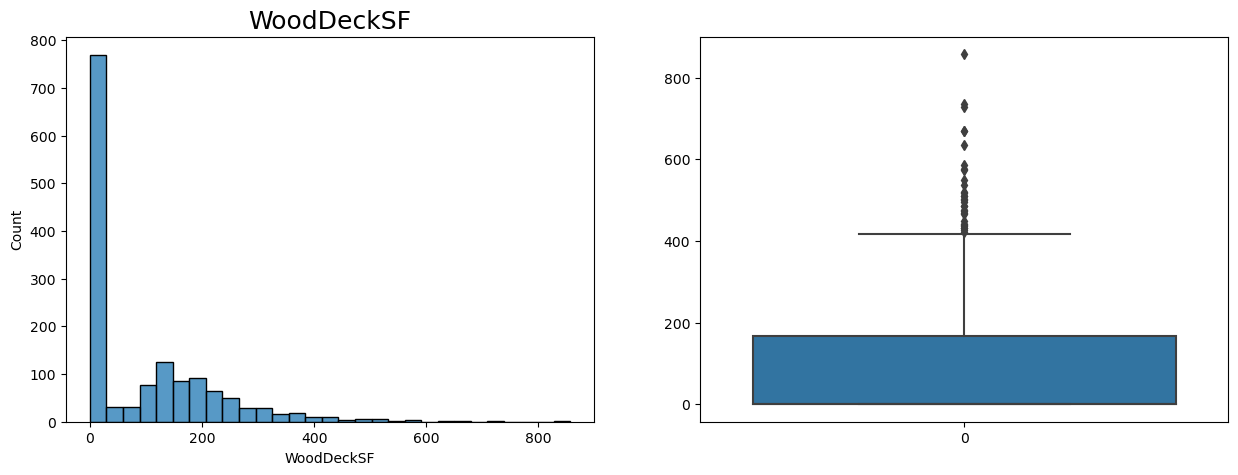

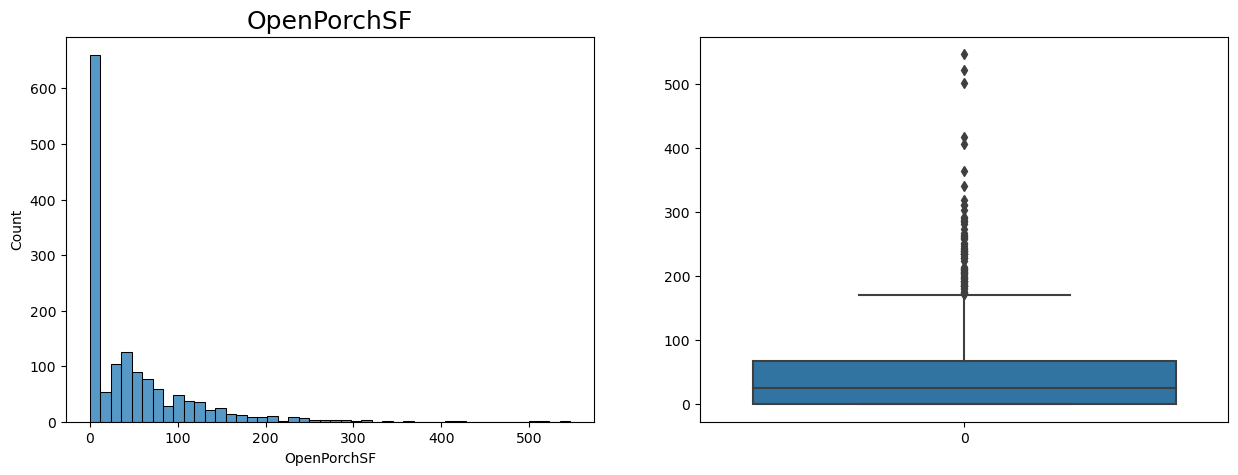

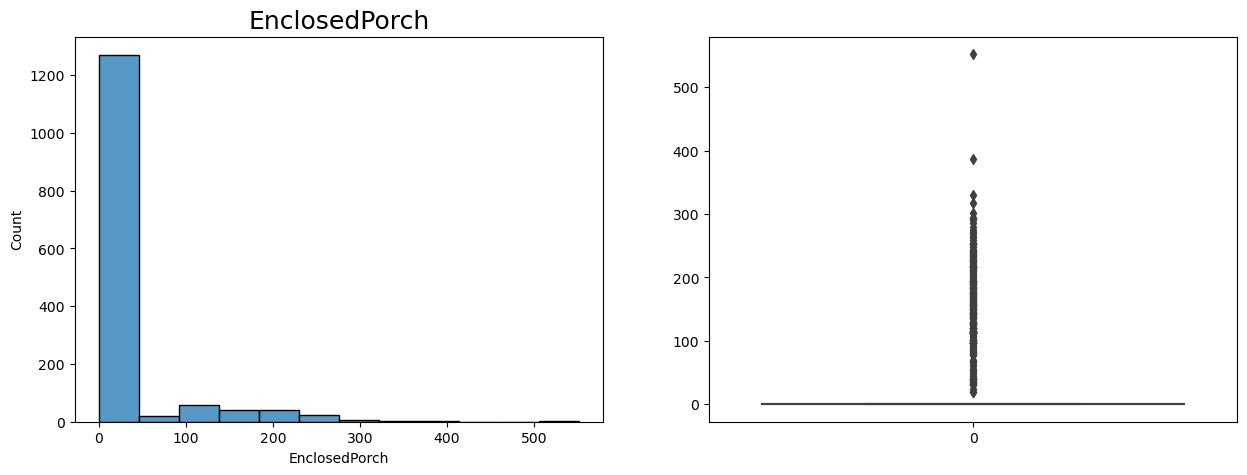

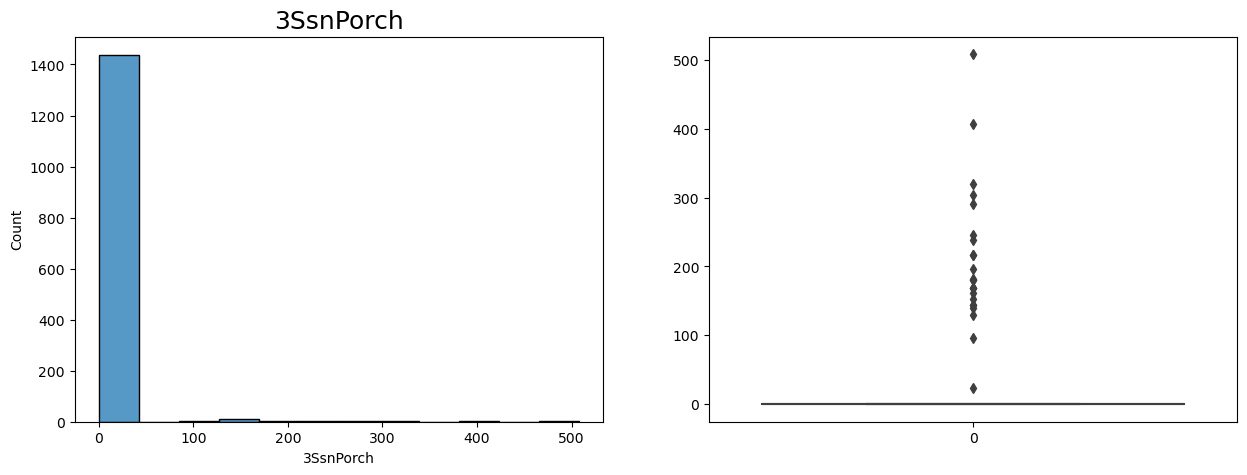

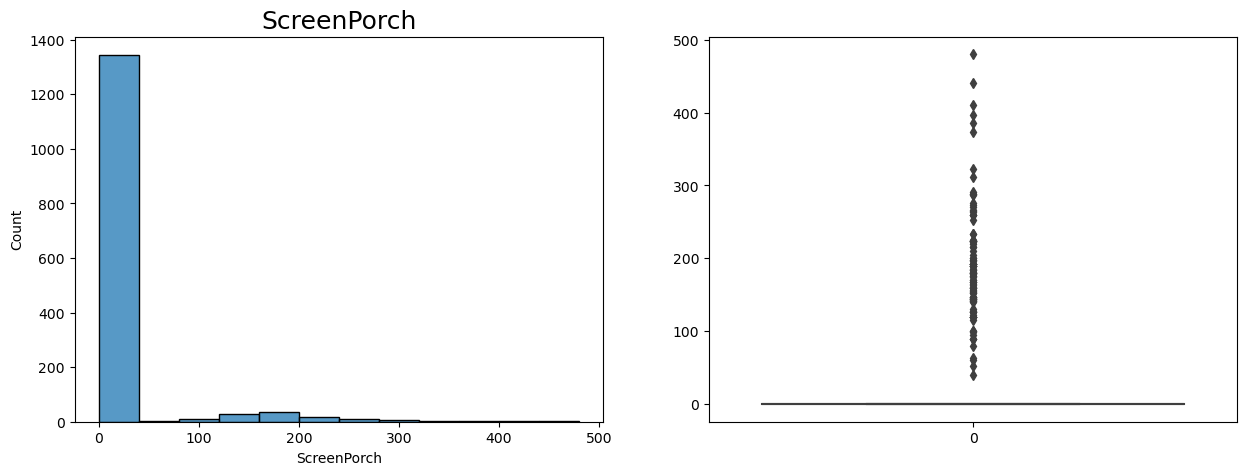

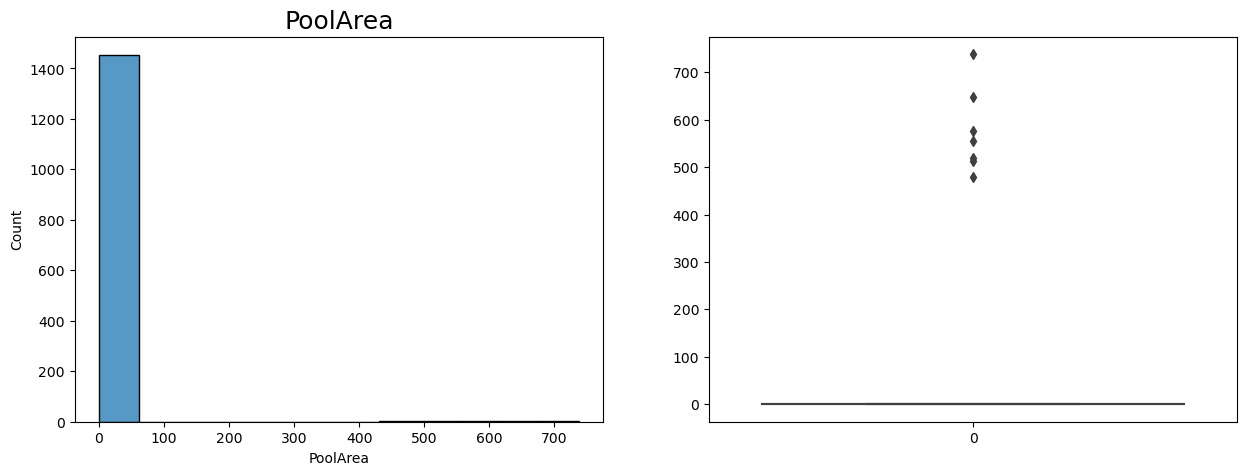

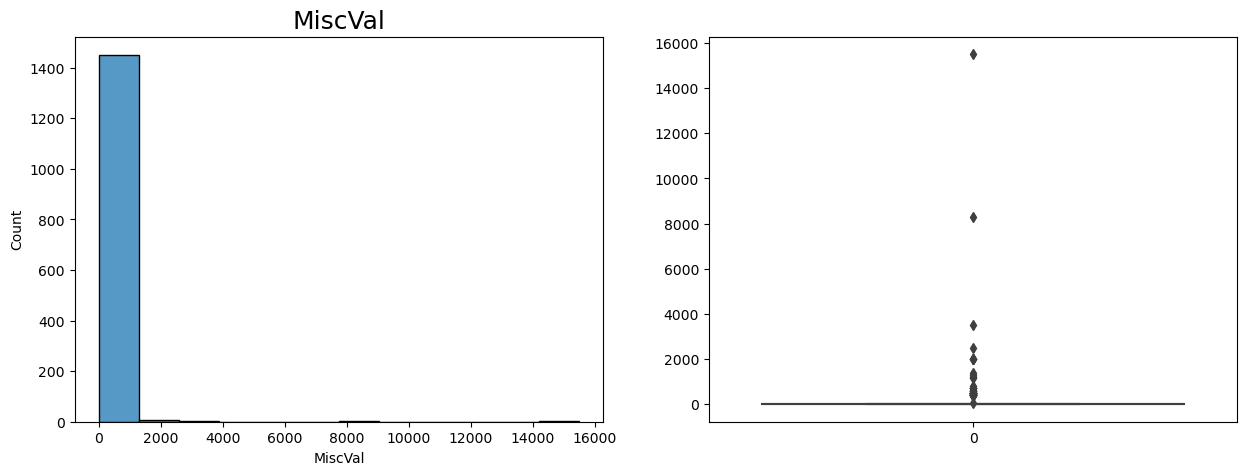

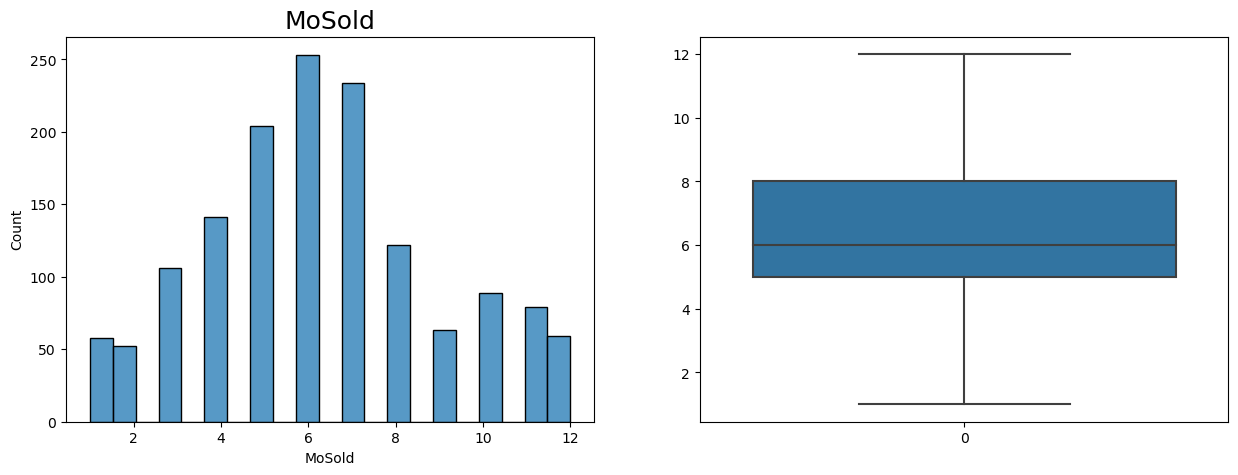

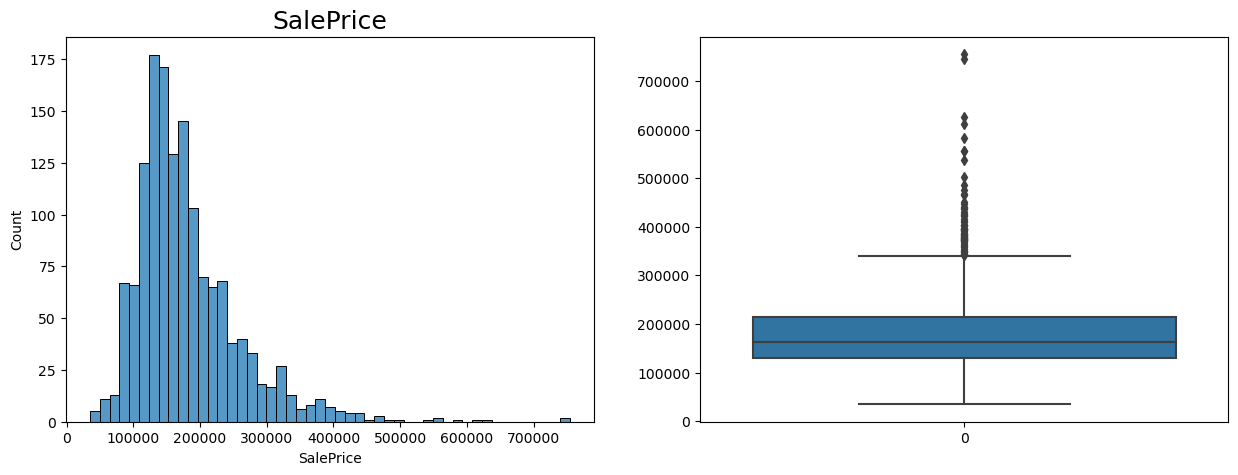

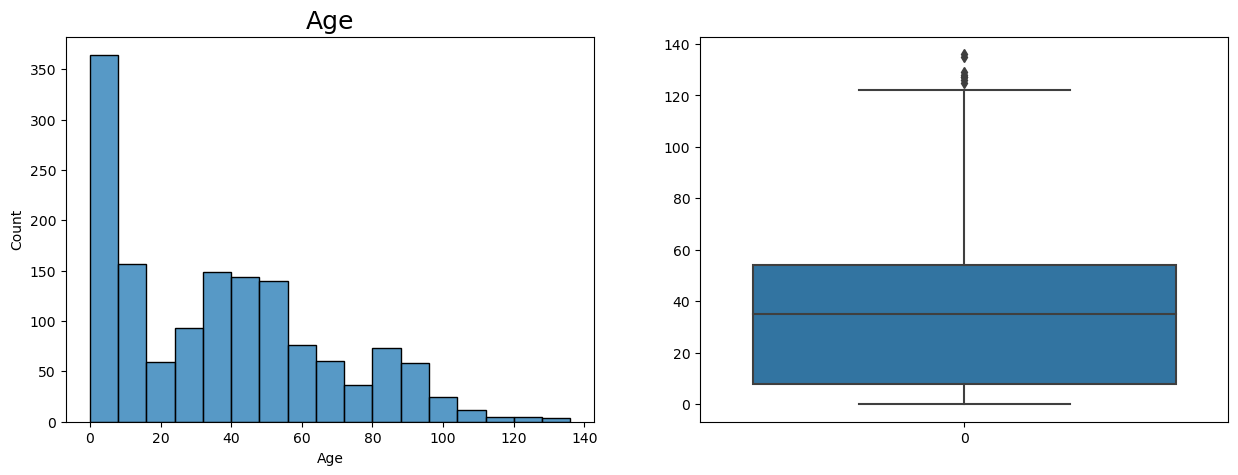

In [27]:
## visualizing the numeric variables using hist,boxplot
for col in housing_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.histplot(housing_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(housing_num[col])
    plt.show() 

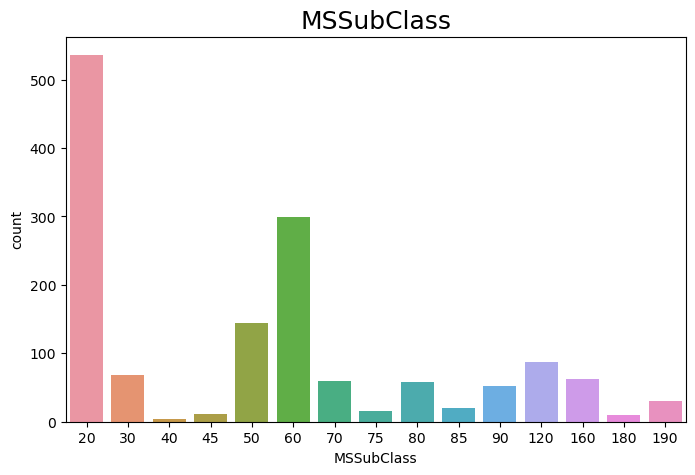

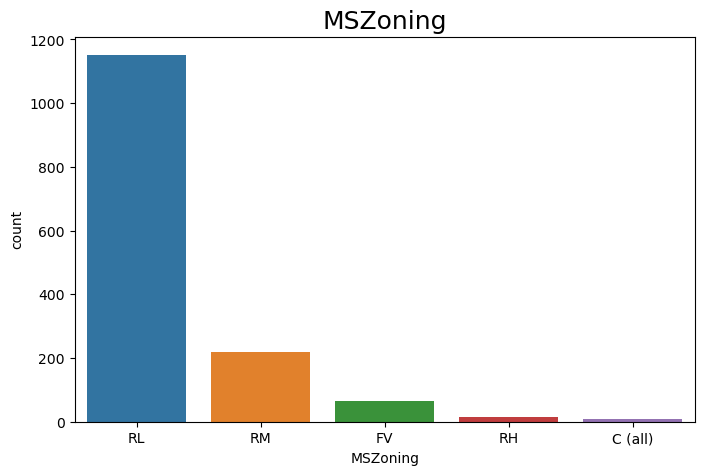

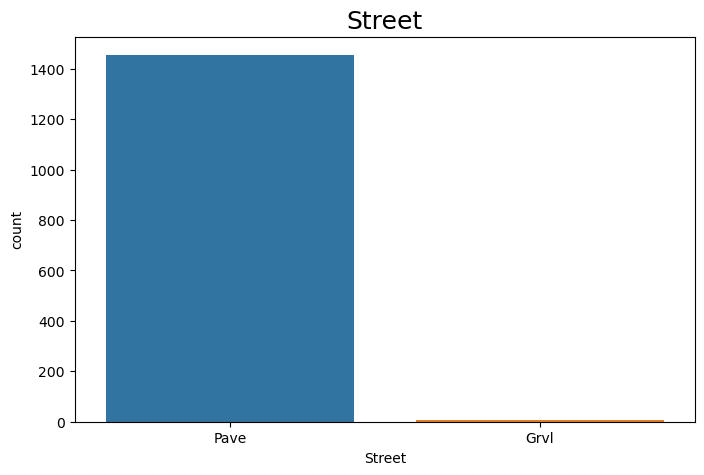

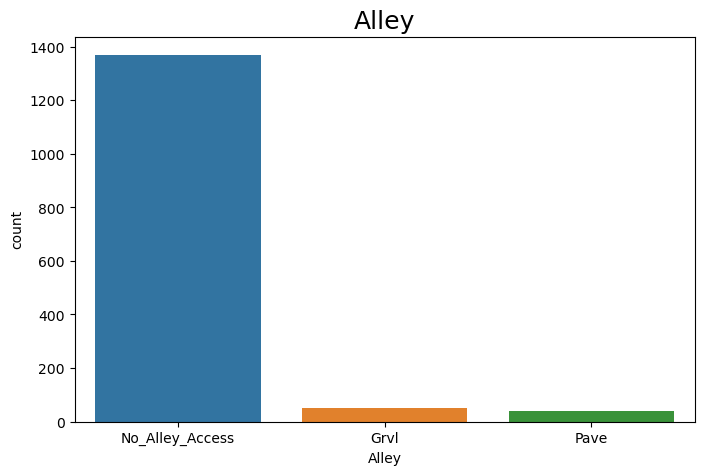

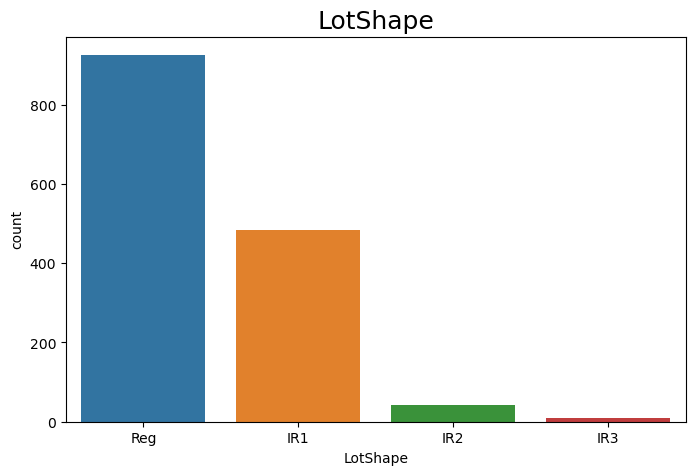

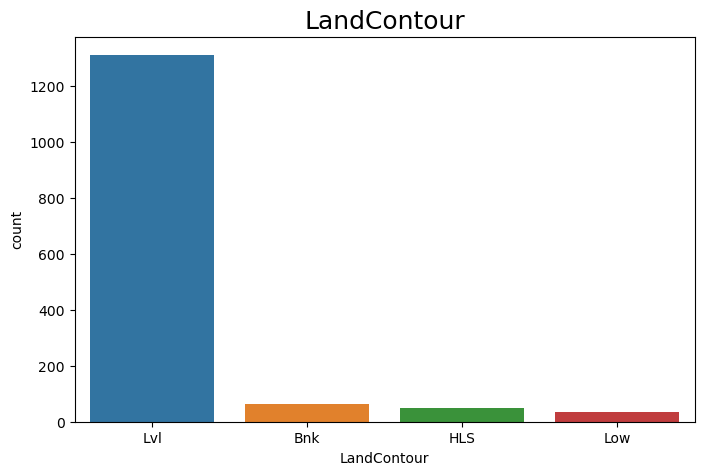

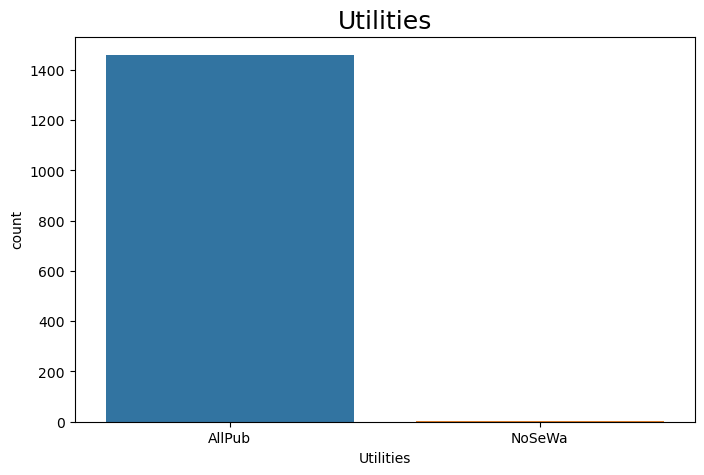

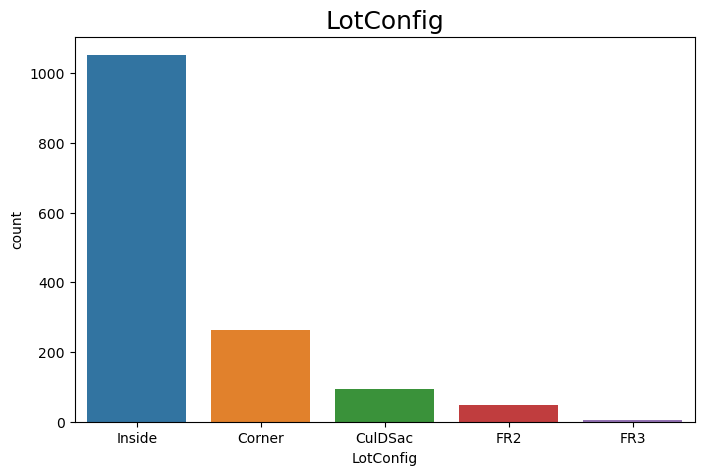

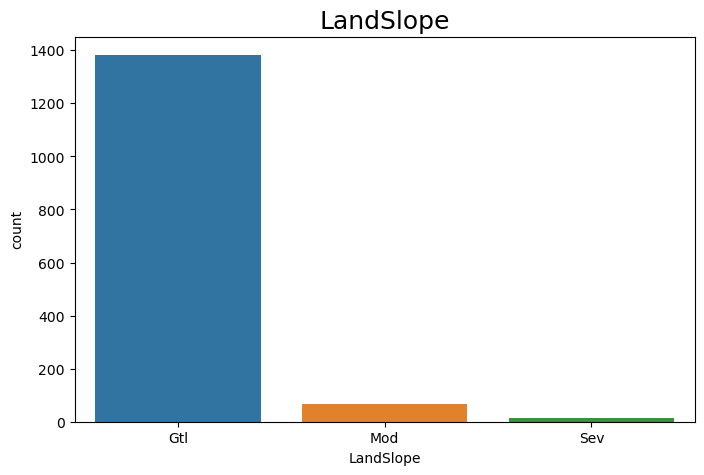

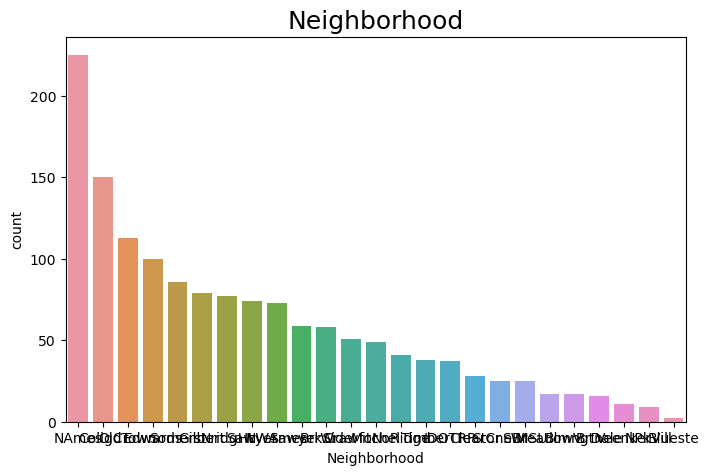

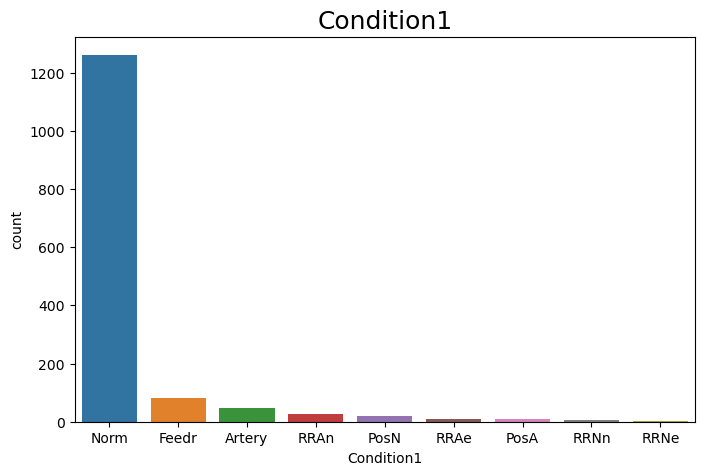

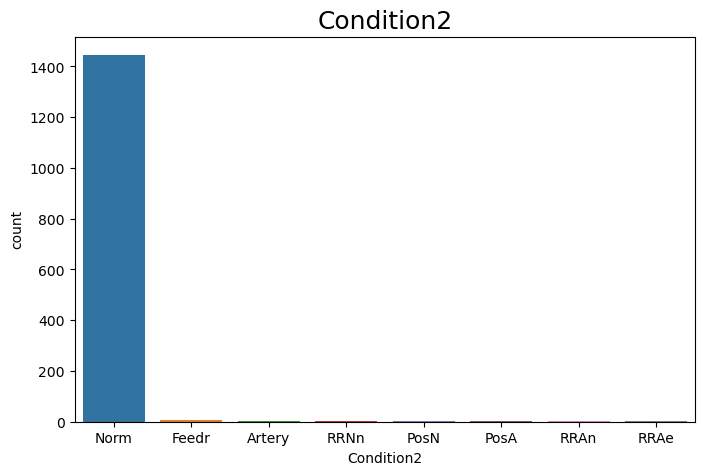

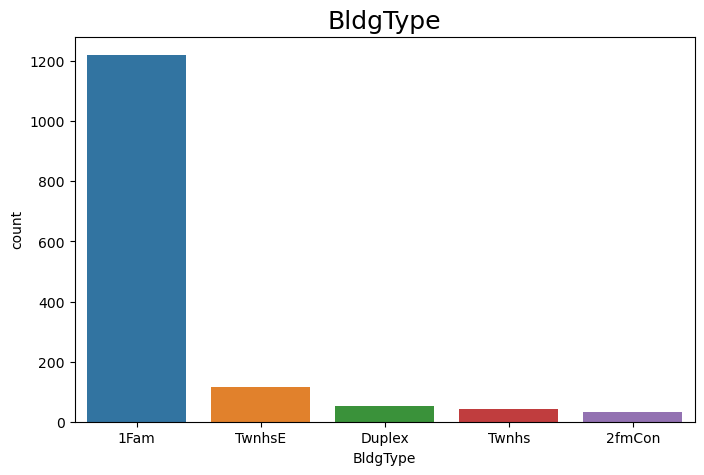

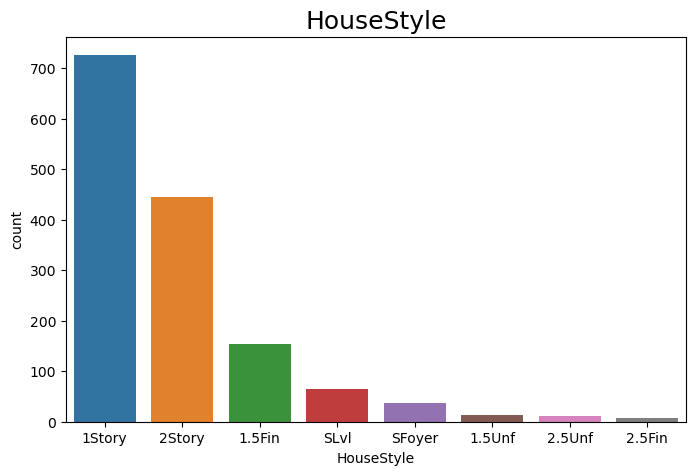

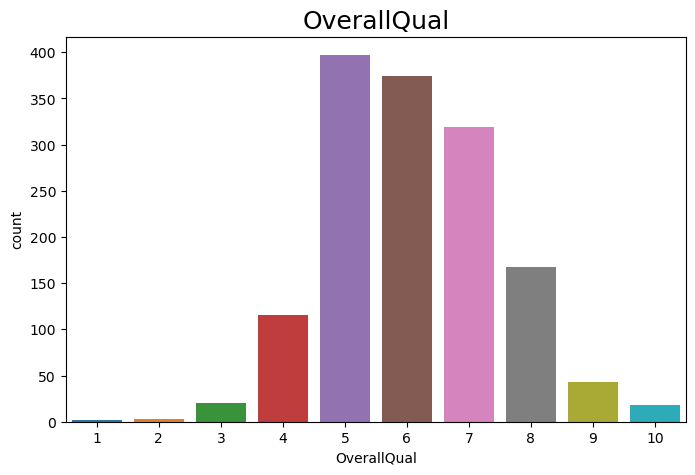

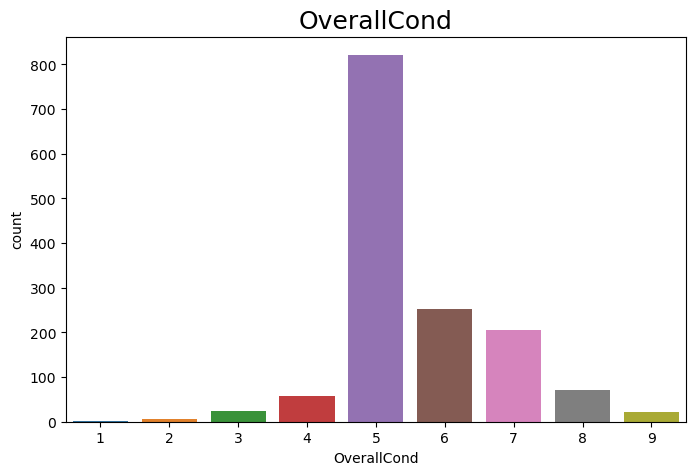

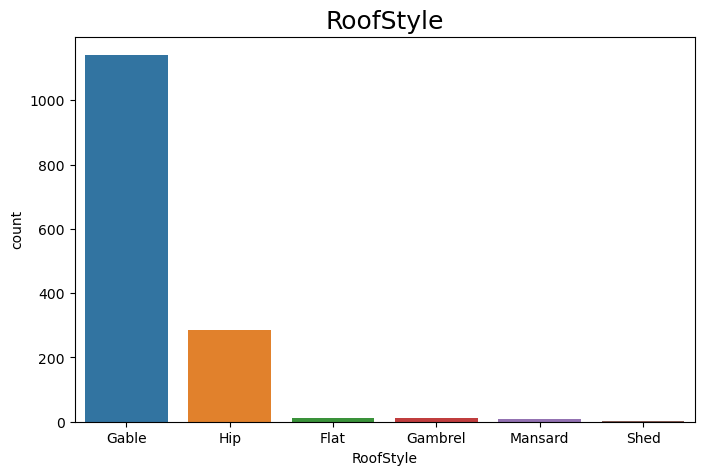

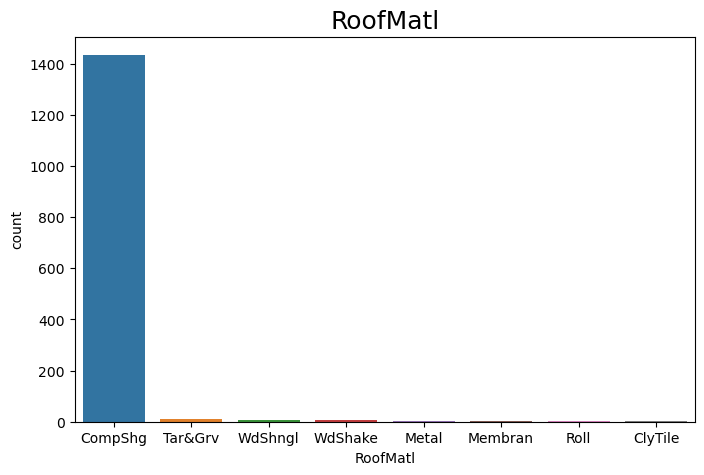

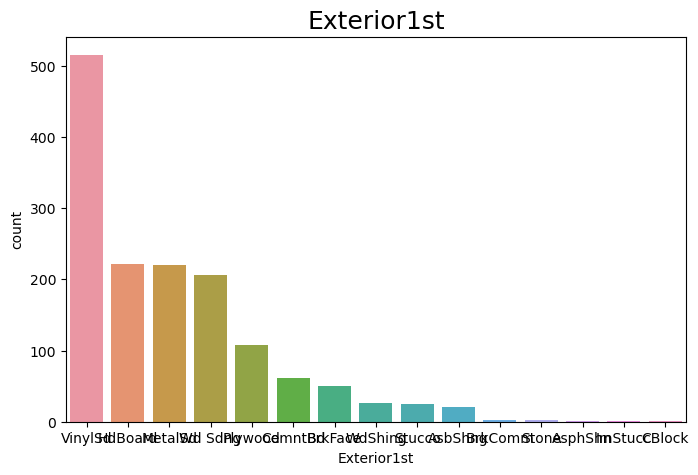

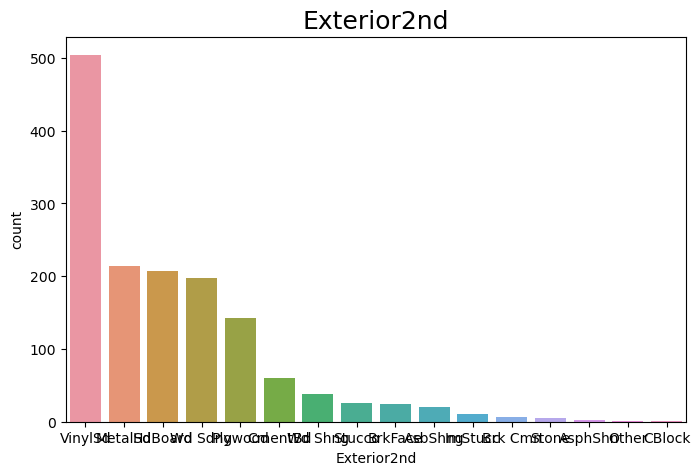

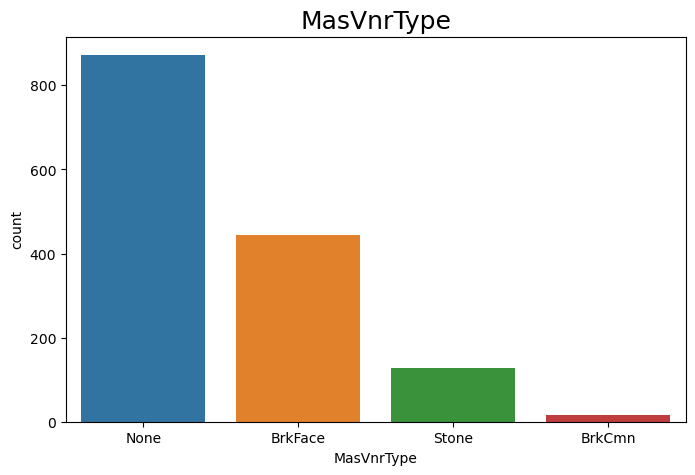

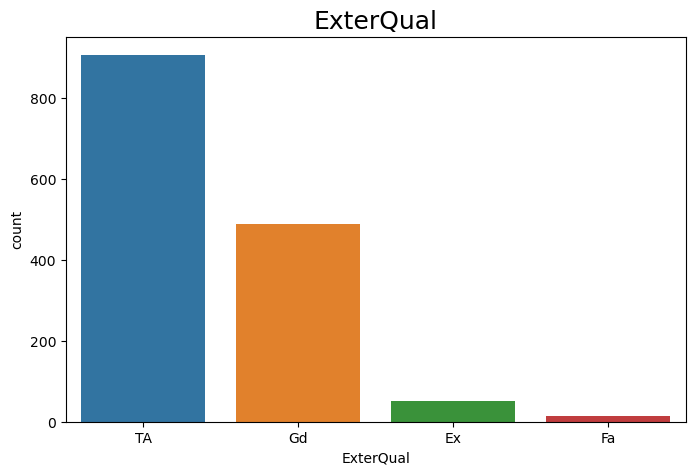

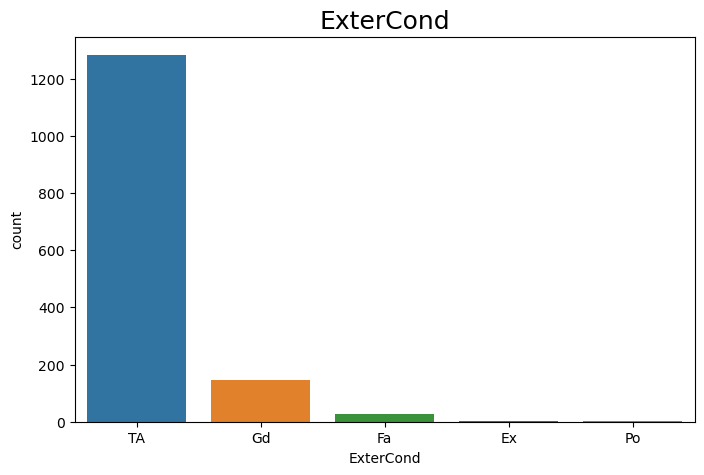

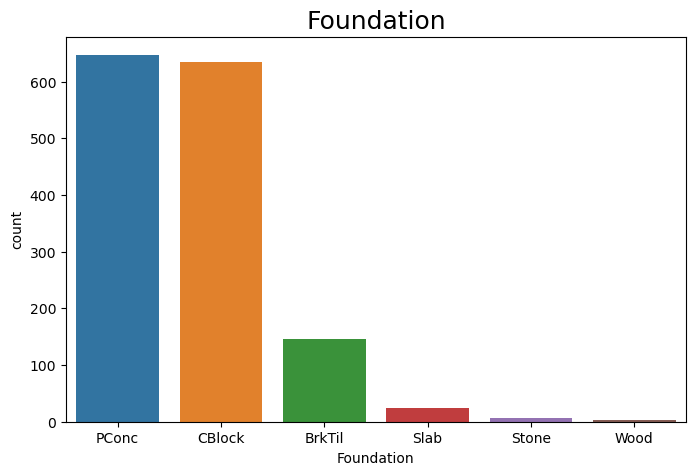

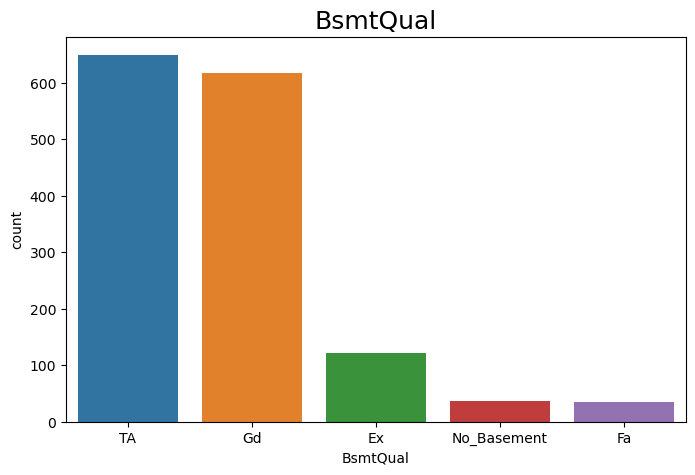

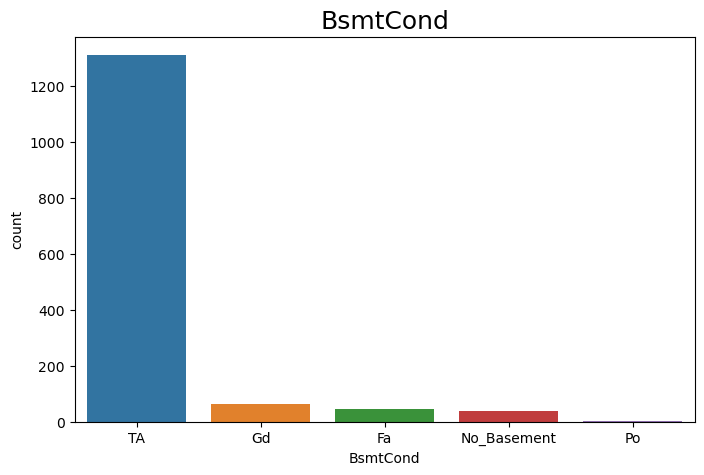

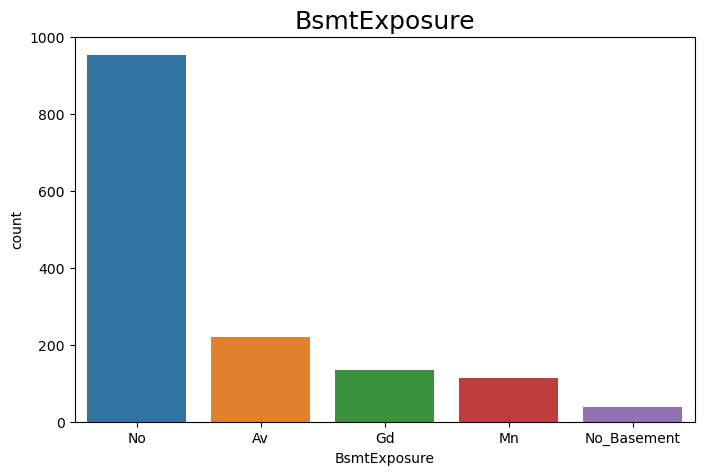

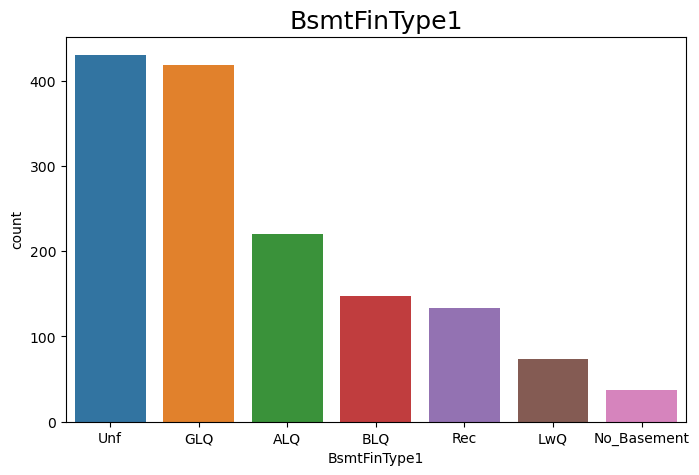

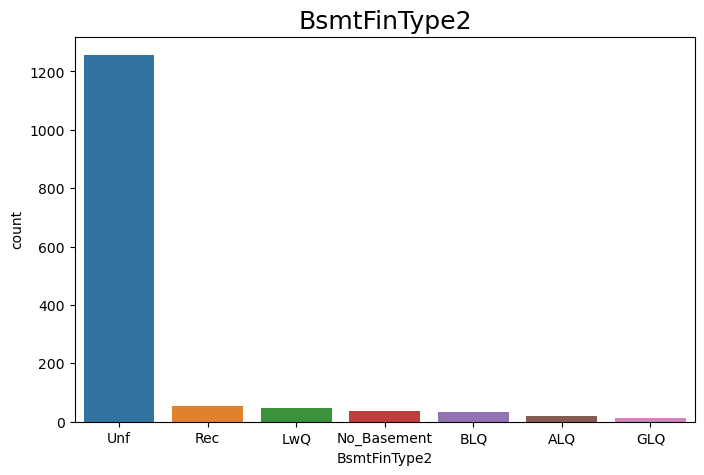

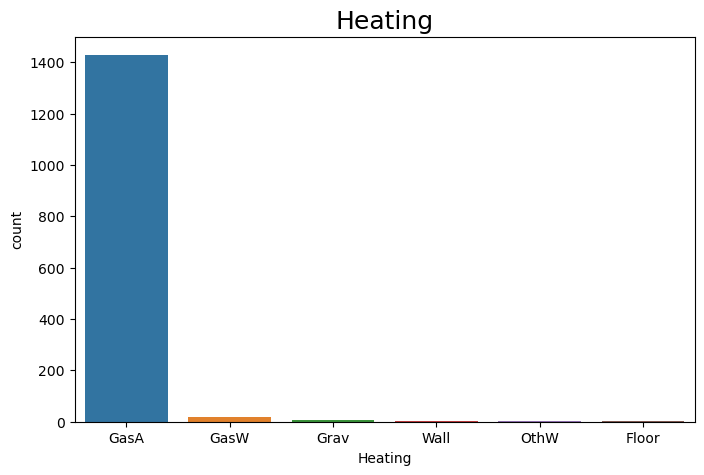

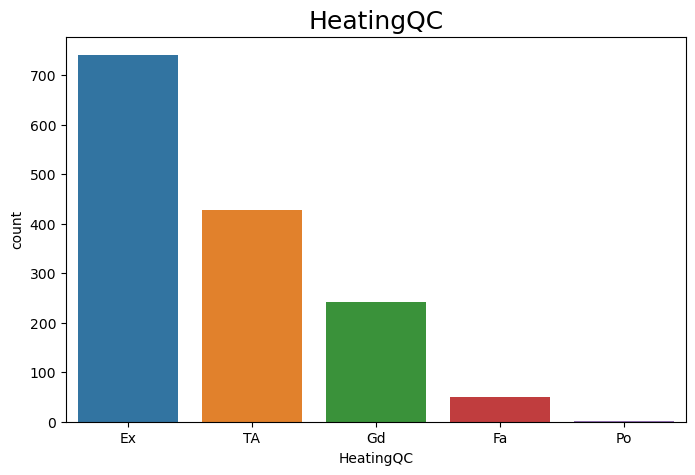

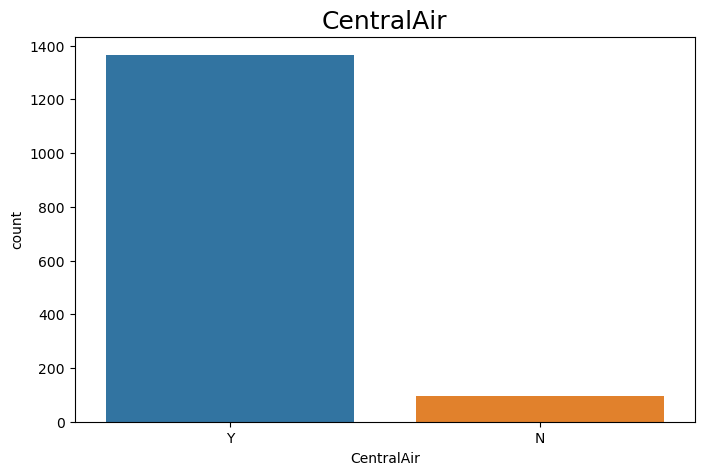

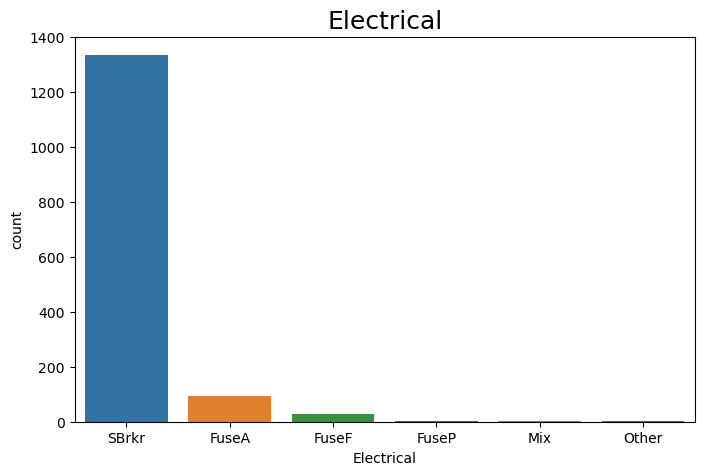

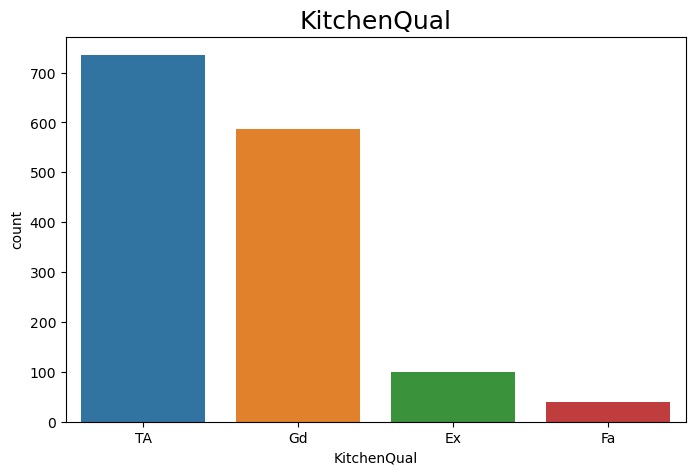

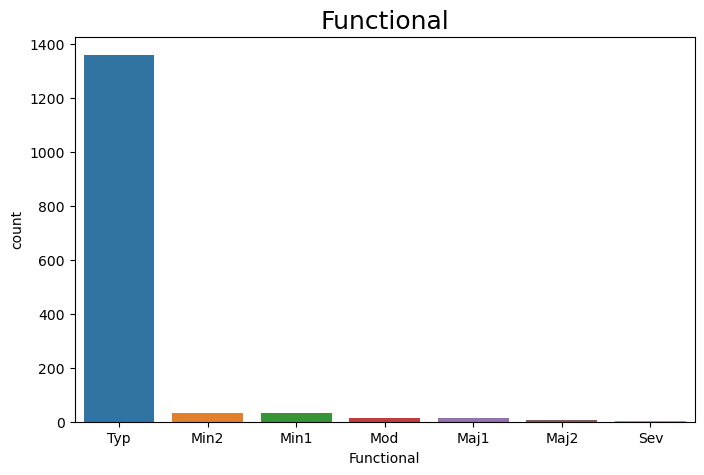

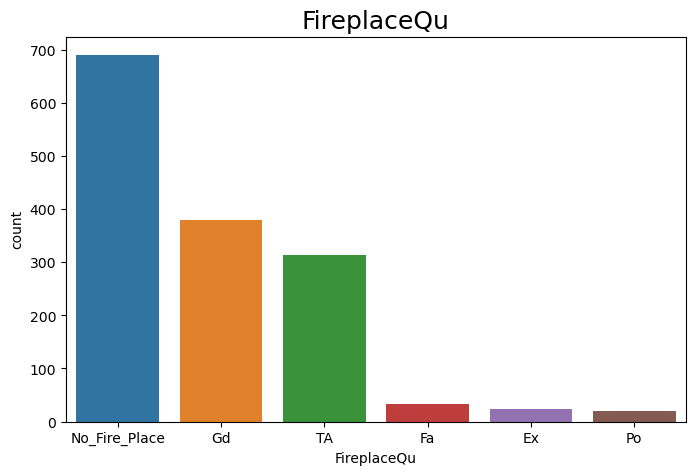

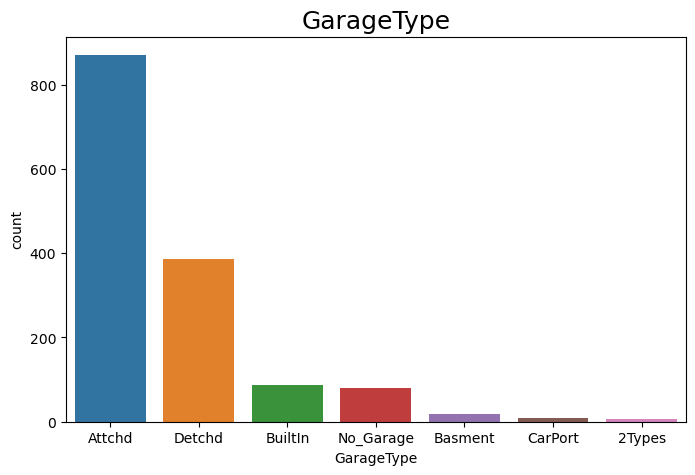

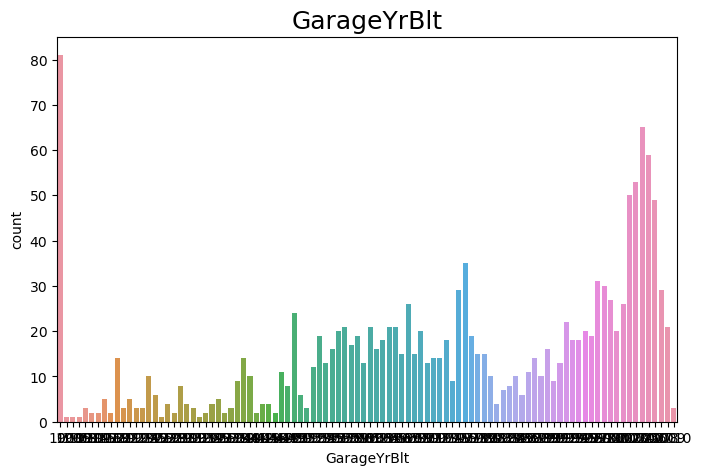

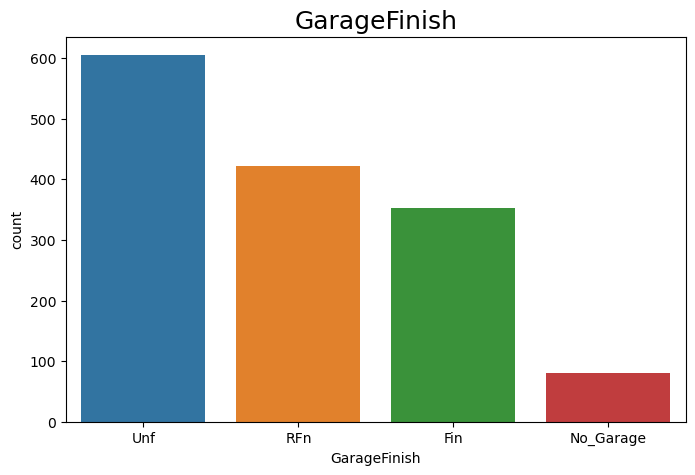

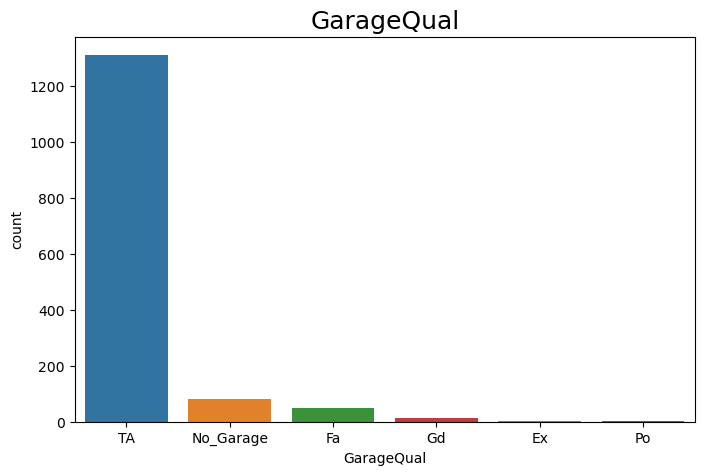

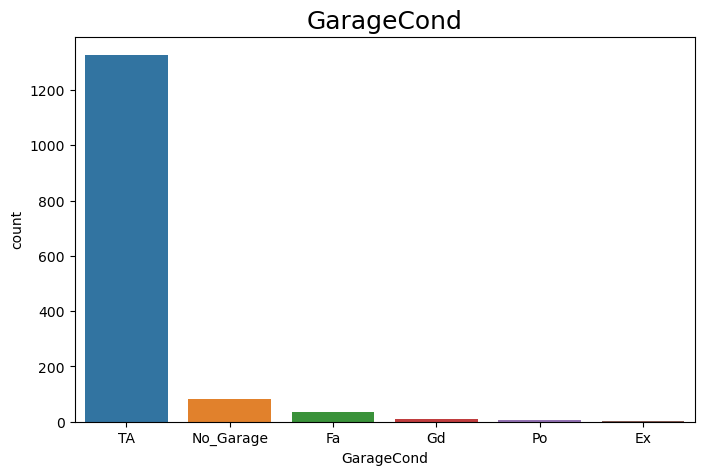

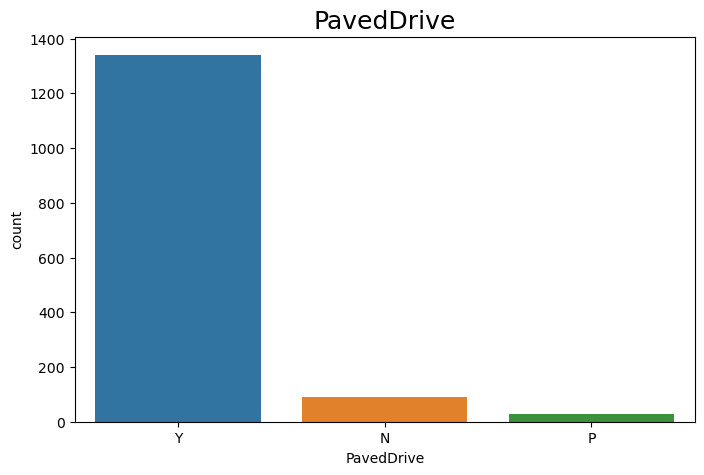

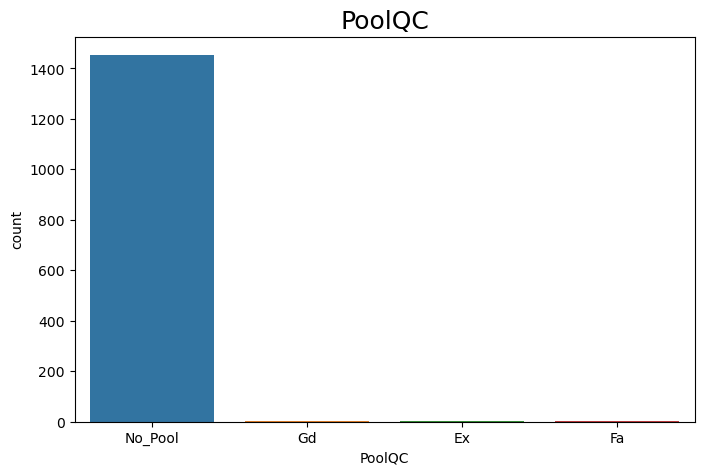

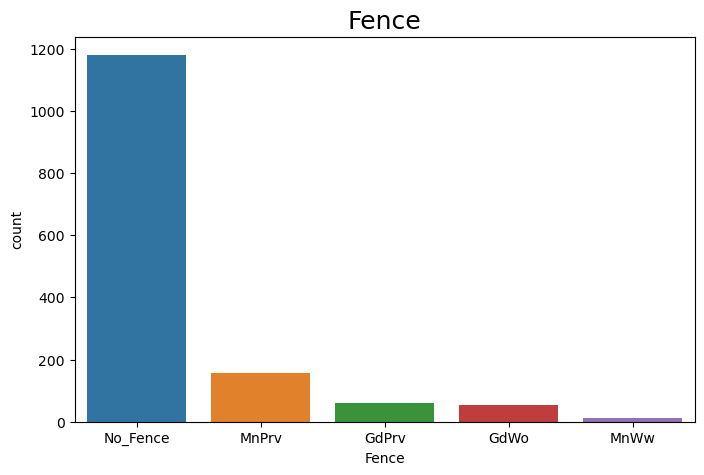

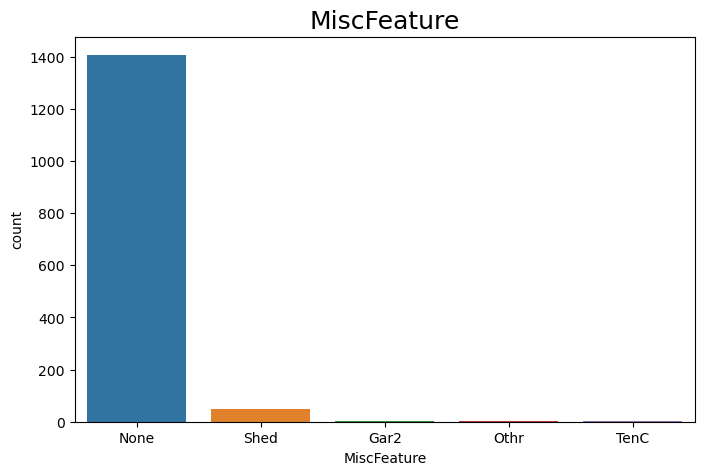

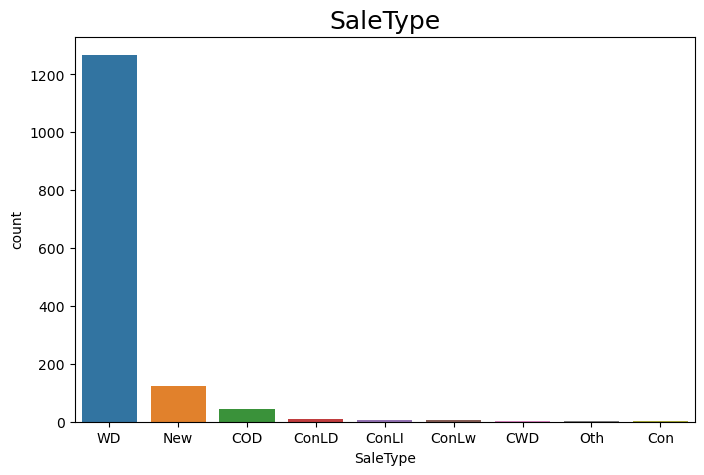

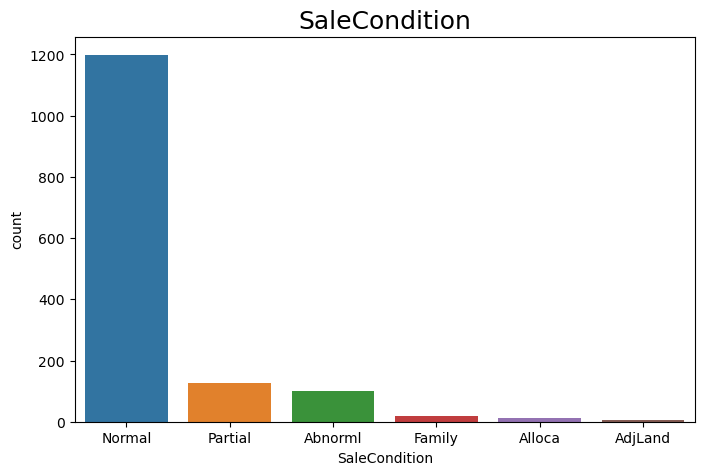

In [28]:
## Visualizing the categorical columns using bar plots
for col in housing_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x=housing_cat[col].value_counts().index, y=housing_cat[col].value_counts())
    plt.show()

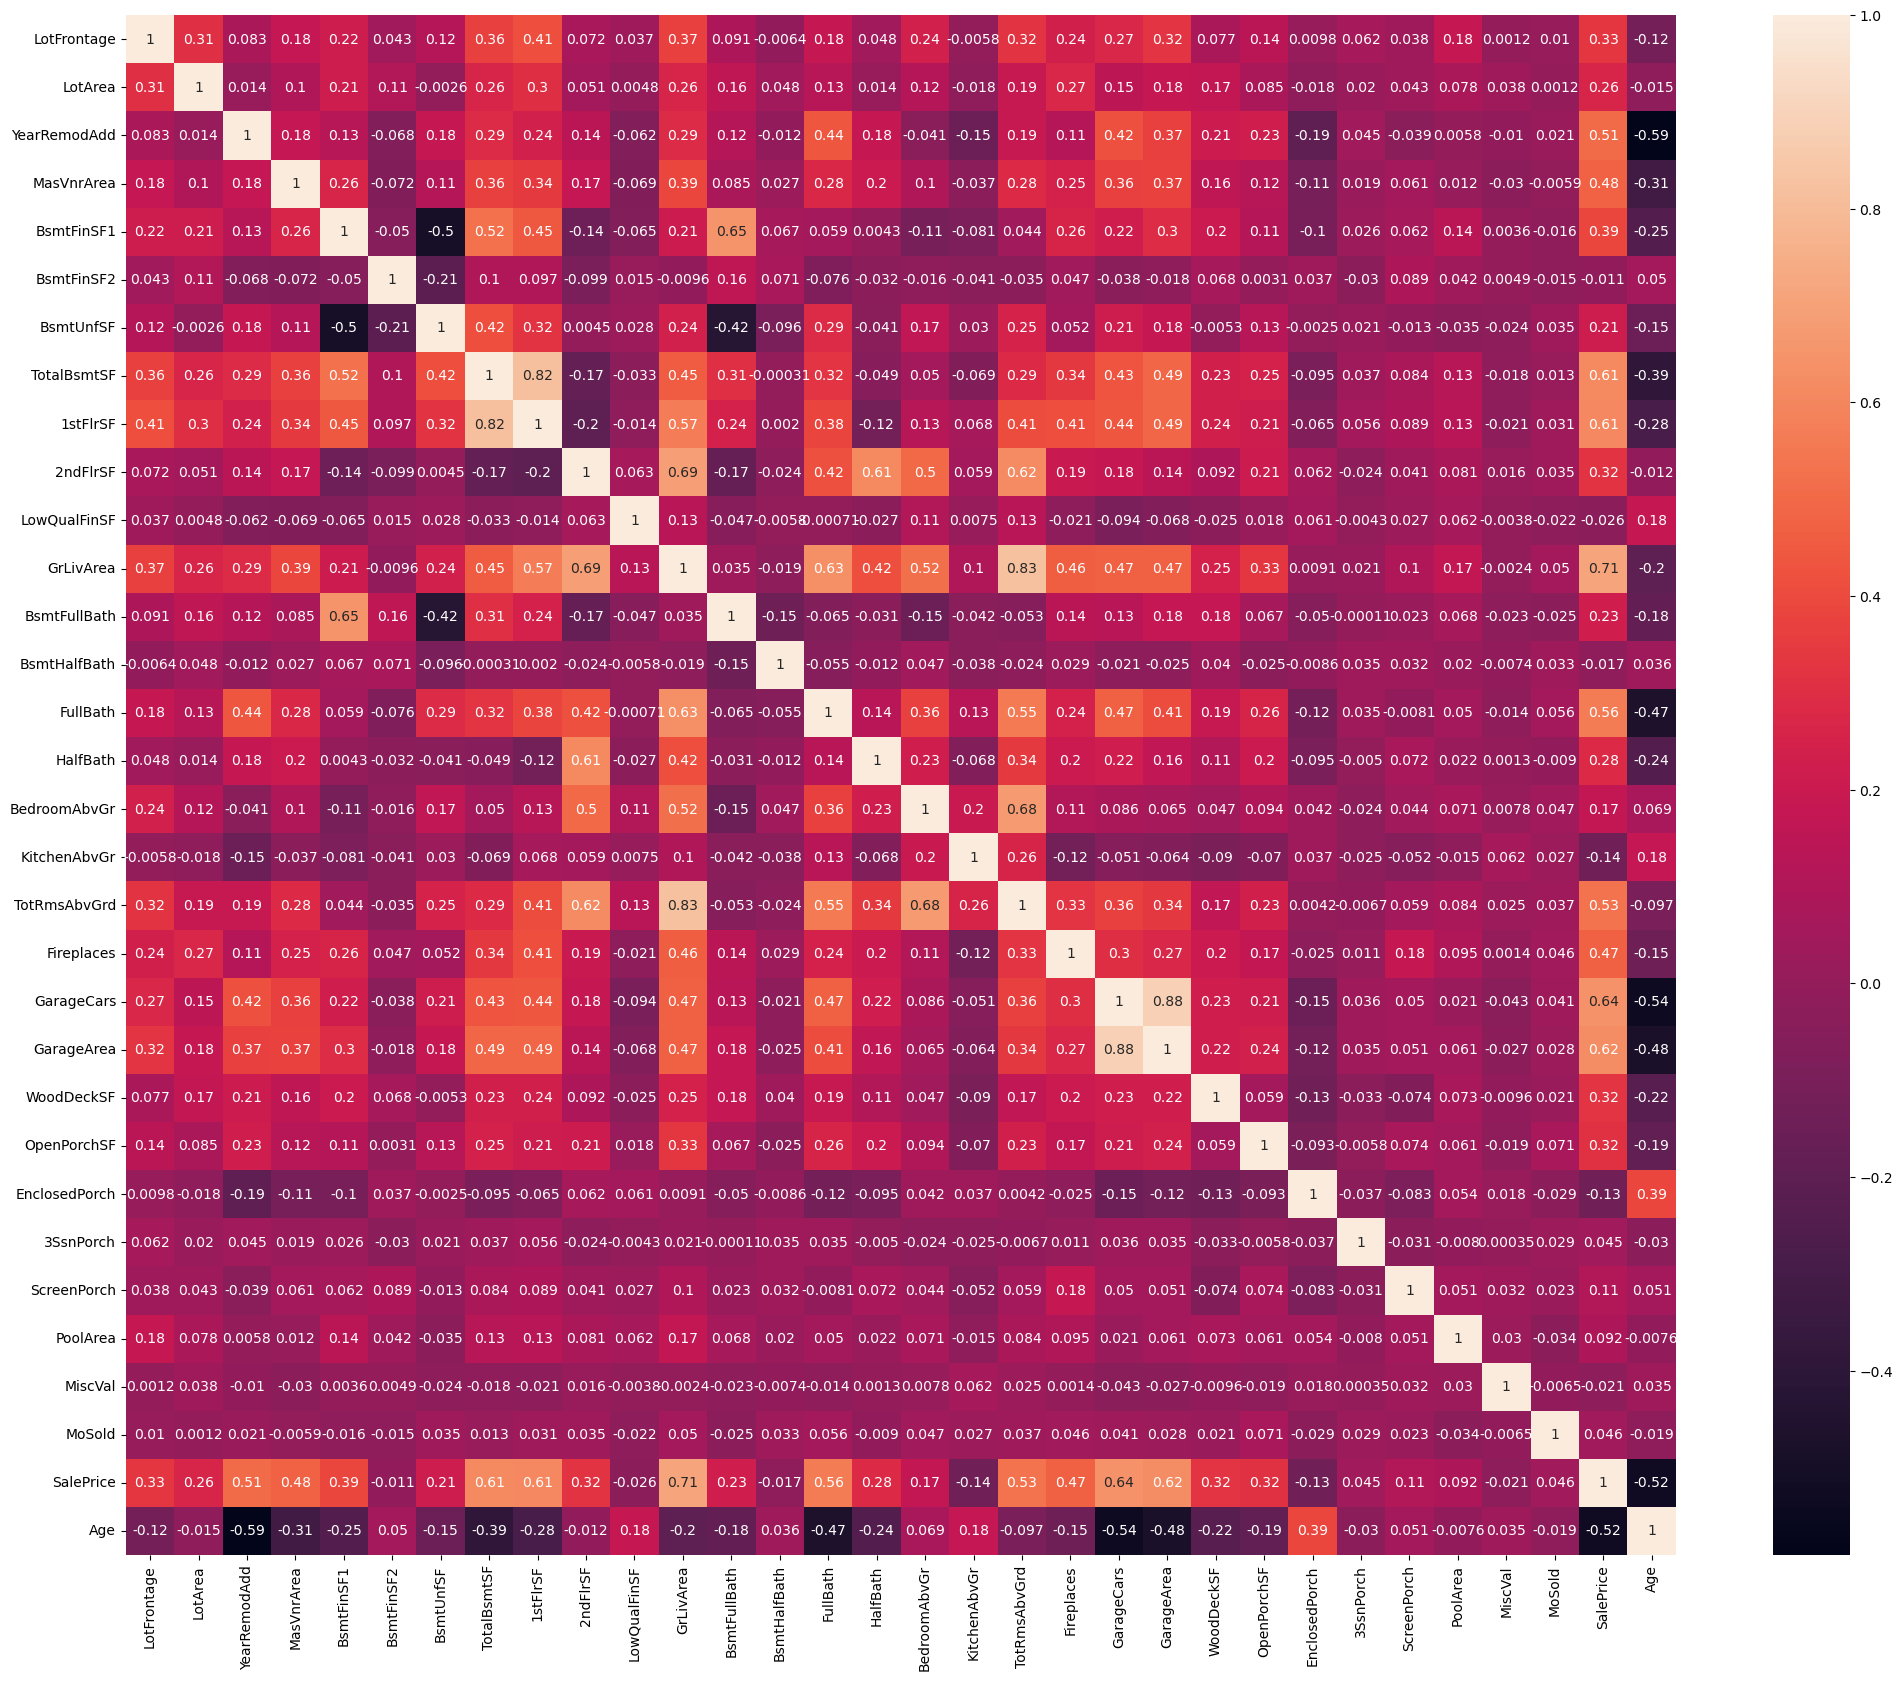

In [29]:
plt.figure(figsize=(25,20))
sns.heatmap(housing_num.corr(), annot=True);

#### Observation: Following pairs are highly correlated

- GarageArea and GarageCars
- TotRmsAbvGr and GrLiveArea
- SalesPrice and OverallQual
- SalesPrice and GrLiveArea

In [30]:
for col in housing_num.columns:
    housing_num[col][housing_num[col] <= housing_num[col].quantile(0.05)] = housing_num[col].quantile(0.05)
    housing_num[col][housing_num[col] >= housing_num[col].quantile(0.95)] = housing_num[col].quantile(0.95)

In [31]:
  # Removing the highly correlated variables

housing_num.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [32]:
cat_cols=housing_cat.columns
print(cat_cols)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [33]:
# New dataframe of dummies
housing_dum=pd.get_dummies(housing[housing_cat.columns],drop_first=True).astype(int)

In [34]:
housing_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 352 entries, MSSubClass_30 to SaleCondition_Partial
dtypes: int32(352)
memory usage: 2.0 MB


In [35]:
housing=pd.concat([housing_num,housing_dum], axis=1)
housing.shape


(1460, 382)

In [36]:
housing['SalePrice']=np.log(housing['SalePrice'])

In [37]:
housing.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Other,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fire_Place,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageYrBlt_1900,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_

In [38]:
# Display column names and their data types
for col in housing.columns:
    print(f'{col}: {housing[col].dtype}')

LotFrontage: float64
LotArea: float64
YearRemodAdd: int64
MasVnrArea: float64
BsmtFinSF1: int64
BsmtFinSF2: float64
BsmtUnfSF: int64
TotalBsmtSF: float64
1stFlrSF: float64
2ndFlrSF: float64
LowQualFinSF: int64
GrLivArea: float64
BsmtFullBath: int64
BsmtHalfBath: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
Fireplaces: int64
GarageCars: int64
WoodDeckSF: int64
OpenPorchSF: float64
EnclosedPorch: float64
3SsnPorch: int64
ScreenPorch: int64
PoolArea: int64
MiscVal: int64
MoSold: int64
SalePrice: float64
Age: int64
MSSubClass_30: int32
MSSubClass_40: int32
MSSubClass_45: int32
MSSubClass_50: int32
MSSubClass_60: int32
MSSubClass_70: int32
MSSubClass_75: int32
MSSubClass_80: int32
MSSubClass_85: int32
MSSubClass_90: int32
MSSubClass_120: int32
MSSubClass_160: int32
MSSubClass_180: int32
MSSubClass_190: int32
MSZoning_FV: int32
MSZoning_RH: int32
MSZoning_RL: int32
MSZoning_RM: int32
Street_Pave: int32
Alley_No_Alley_Access: int32
Alley_Pave: int32
LotShape_I

## Model Building and Evaluation

In [39]:
y=housing.pop('SalePrice')
X=housing

In [40]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

### Train - Test Split

In [41]:
## Splitting X and y into 70% train data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=42)

In [42]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1168, 381)
(1168,)


In [43]:
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(292, 381)
(292,)


### Scaling numerical variables

In [44]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [45]:

scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Model: Ridge Regression

In [46]:
#Cross validation

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
folds=5
ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
ridgeCV.best_params_

{'alpha': 10.0}

In [48]:
## View the results of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.02508178, 0.01509657, 0.01874514, 0.01569924, 0.0156208 ,
        0.01561584, 0.01997628, 0.01560087, 0.01414165, 0.01562099,
        0.02503295, 0.01377454, 0.01562095, 0.01874599, 0.02507362,
        0.01874619, 0.03124261, 0.02499394, 0.02187099, 0.02811904,
        0.03124342, 0.02819724, 0.02187018, 0.01562157, 0.01710262,
        0.02014861, 0.02819924, 0.02499666]),
 'std_fit_time': array([1.15185624e-02, 5.84061190e-03, 6.24897487e-03, 1.57786893e-04,
        1.79432752e-06, 8.20741891e-06, 8.71055162e-03, 4.40248541e-05,
        3.63017417e-03, 2.45188906e-06, 7.77222439e-03, 3.68674241e-03,
        3.75461954e-06, 6.24842647e-03, 7.71885573e-03, 6.24833109e-03,
        4.26496120e-07, 7.65311758e-03, 7.65237790e-03, 6.24880810e-03,
        1.51240840e-06, 6.28972773e-03, 7.65265037e-03, 1.33684595e-06,
        6.16157491e-03, 6.17576911e-03, 6.29133025e-03, 7.65163853e-03]),
 'mean_score_time': array([0.00205483, 0.00522528, 0.00937266, 0.00312448, 

In [49]:
# Create a ridge regreesion instance with optimum value alpha=10
ridge = Ridge(alpha=10)
# Fit the model on training data
ridge.fit(X_train, y_train)


Ridge(alpha=10)

In [50]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([ 0.00667764,  0.02145185,  0.02463569, -0.00215904,  0.00955659,
       -0.00090701, -0.01597681,  0.05318917,  0.00825792,  0.03001595,
        0.        ,  0.08948329,  0.00864667, -0.0001647 ,  0.0113487 ,
        0.01194323,  0.00424986,  0.        ,  0.01815028,  0.02902677,
        0.01233071,  0.00788753,  0.00285757,  0.        ,  0.01091512,
        0.        ,  0.        , -0.0010534 , -0.05142375, -0.03987336,
        0.00505719,  0.00019642, -0.00535933, -0.00515659,  0.03807999,
        0.03067677,  0.00122994,  0.00485904, -0.03514664,  0.0041723 ,
       -0.05228076, -0.01120171, -0.01782622,  0.03522612,  0.01478885,
        0.0101608 , -0.0261682 , -0.00573826, -0.00546585,  0.01520834,
        0.00969093, -0.02069166, -0.00030804,  0.03564409,  0.01452203,
        0.01512764, -0.01277547,  0.02515306, -0.02086007, -0.00394527,
       -0.00106238, -0.00534903,  0.03277262, -0.00412282, -0.00113897,
        0.03355862,  0.02764074, -0.01415157,  0.07457691, -0.05

In [51]:
## Make predictions
y_train_pred = ridge.predict(X_train)
print('r2_score for train using ridge regression',r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print('r2_score for test using ridge regression',r2_score(y_test,y_test_pred))

r2_score for train using ridge regression 0.9399061513806699
r2_score for test using ridge regression 0.9260258408690555


### Model: Lasso Regression

In [52]:
#Cross validation

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
folds=5
lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
lassoCV.best_params_

{'alpha': 0.001}

In [54]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_train, y_train)


Lasso(alpha=0.001)

In [55]:
y_train_pred=lasso.predict(X_train)
print('r2_score for train using lasso regression',r2_score(y_train, y_train_pred))
y_test_pred = lasso.predict(X_test)
print('r2_score for test using lasso regression',r2_score(y_test,y_test_pred))

r2_score for train using lasso regression 0.920360032292465
r2_score for test using lasso regression 0.9249985328199668


In [56]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.097411,0.013771,0.009490,0.007752,0.0001,{'alpha': 0.0001},-0.069768,-0.082140,-0.082916,-0.082607,-0.075697,-0.078626,0.005170,2,-0.056617,-0.053739,-0.053984,-0.054270,-0.055585,-0.054839,0.001094
1,0.034367,0.006250,0.009440,0.007709,0.001,{'alpha': 0.001},-0.069195,-0.082105,-0.078685,-0.080389,-0.070565,-0.076188,0.005280,1,-0.071657,-0.067276,-0.068523,-0.068916,-0.070422,-0.069359,0.001526
2,0.021872,0.007664,0.003124,0.006249,0.01,{'alpha': 0.01},-0.092235,-0.111578,-0.102040,-0.104619,-0.090569,-0.100208,0.007856,3,-0.099183,-0.095500,-0.097749,-0.097504,-0.099991,-0.097985,0.001544
3,0.023209,0.006744,0.015849,0.009834,0.05,{'alpha': 0.05},-0.109637,-0.133333,-0.129805,-0.127655,-0.113289,-0.122744,0.009458,4,-0.123125,-0.118578,-0.121910,-0.121058,-0.123309,-0.121596,0.001718
4,0.021070,0.006446,0.007872,0.006979,0.1,{'alpha': 0.1},-0.144592,-0.168175,-0.180403,-0.164885,-0.150914,-0.161794,0.012734,5,-0.164458,-0.157521,-0.160557,-0.159797,-0.161360,-0.160739,0.002258
5,0.028121,0.006250,0.012494,0.006247,0.2,{'alpha': 0.2},-0.239648,-0.251524,-0.277194,-0.255624,-0.233263,-0.251451,0.015167,6,-0.256051,-0.249270,-0.250132,-0.247912,-0.251069,-0.250887,0.002783
6,0.024972,0.007635,0.009374,0.007653,0.3,{'alpha': 0.3},-0.274800,-0.286080,-0.307810,-0.291118,-0.268801,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
7,0.015629,0.000014,0.012497,0.006249,0.4,{'alpha': 0.4},-0.274800,-0.286080,-0.307810,-0.291118,-0.268801,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
8,0.018746,0.006247,0.006243,0.007645,0.5,{'alpha': 0.5},-0.274800,-0.286080,-0.307810,-0.291118,-0.268801,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
9,0.021865,0.007660,0.006249,0.007653,0.6,{'alpha': 0.6},-0.274800,-0.286080,-0.307810,-0.291118,-0.268801,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211


In [57]:
mean_squared_error(y_test, lasso.predict(X_test))

0.010019091801407136

In [58]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotFrontage,0.0037
1,LotArea,0.0225
2,YearRemodAdd,0.0280
3,BsmtFinSF1,0.0252
4,BsmtFinSF2,0.0012
...,...,...
76,GarageFinish_Unf,-0.0056
77,GarageCond_TA,0.0039
78,PavedDrive_Y,0.0001
79,SaleCondition_Normal,0.0169


In [59]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotFrontage': 0.0037031453652831103,
 'LotArea': 0.022528649377688507,
 'YearRemodAdd': 0.027956001056230067,
 'MasVnrArea': -0.0,
 'BsmtFinSF1': 0.02518469579748425,
 'BsmtFinSF2': 0.001171700890755533,
 'BsmtUnfSF': -0.0011480692327407063,
 'TotalBsmtSF': 0.044256672112270794,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.010606873898391276,
 'LowQualFinSF': 0.0,
 'GrLivArea': 0.10799037663860915,
 'BsmtFullBath': 0.00953314134507384,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.005368269270421423,
 'HalfBath': 0.009284268275293831,
 'BedroomAbvGr': 0.0,
 'KitchenAbvGr': 0.0,
 'Fireplaces': 0.021626011130196035,
 'GarageCars': 0.03501971193117054,
 'WoodDeckSF': 0.011391257501290025,
 'OpenPorchSF': 0.008225059881428461,
 'EnclosedPorch': 0.0022483225984565635,
 '3SsnPorch': 0.0,
 'ScreenPorch': 0.010689994165003899,
 'PoolArea': 0.0,
 'MiscVal': 0.0,
 'MoSold': -0.00037943137035642603,
 'Age': -0.05319236404849769,
 'MSSubClass_30': -0.0017834305261365555,
 'MSSubClass_40': 0.0,
 'MSSubClass_45': 0.0,

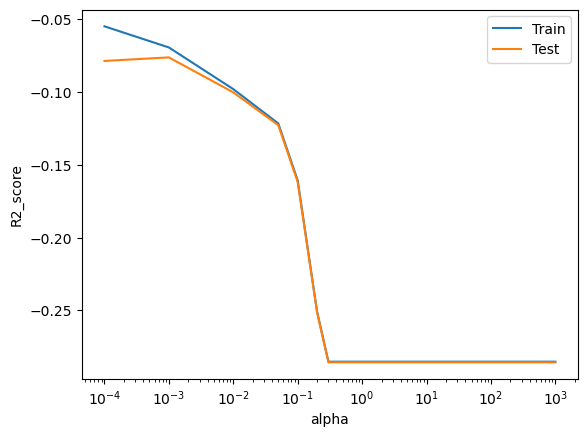

In [60]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [61]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [62]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [63]:
betas

,Ridge,Lasso
LotFrontage,0.006678,0.003703
LotArea,0.021452,0.022529
YearRemodAdd,0.024636,0.027956
MasVnrArea,-0.002159,-0.000000
BsmtFinSF1,0.009557,0.025185
...,...,...
SaleCondition_AdjLand,0.019487,0.000000
SaleCondition_Alloca,0.062676,0.000000
SaleCondition_Family,-0.009075,-0.000000
SaleCondition_Normal,0.034552,0.016900


In [64]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.003703
LotArea                  0.022529
YearRemodAdd             0.027956
BsmtFinSF1               0.025185
BsmtFinSF2               0.001172
                           ...   
GarageFinish_Unf        -0.005601
GarageCond_TA            0.003922
PavedDrive_Y             0.000136
SaleCondition_Normal     0.016900
SaleCondition_Partial    0.022127
Name: Lasso, Length: 81, dtype: float64

In [65]:
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.089483
OverallQual_9           0.079554
OverallQual_8           0.078592
OverallCond_9           0.075626
Neighborhood_Crawfor    0.074577
Functional_Typ          0.067655
Exterior1st_BrkFace     0.067524
SaleCondition_Alloca    0.062676
CentralAir_Y            0.053957
TotalBsmtSF             0.053189
Name: Ridge, dtype: float64

In [66]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.093609
OverallQual_9           1.082804
OverallQual_8           1.081763
OverallCond_9           1.078559
Neighborhood_Crawfor    1.077428
Functional_Typ          1.069996
Exterior1st_BrkFace     1.069856
SaleCondition_Alloca    1.064682
CentralAir_Y            1.055439
TotalBsmtSF             1.054629
Name: Ridge, dtype: float64

In [67]:
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           0.120942
GrLivArea               0.107990
OverallQual_8           0.104639
Neighborhood_Crawfor    0.083173
Functional_Typ          0.074516
Exterior1st_BrkFace     0.074138
Neighborhood_Somerst    0.047090
CentralAir_Y            0.047063
TotalBsmtSF             0.044257
OverallCond_9           0.038956
Name: Lasso, dtype: float64

In [68]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.128559
GrLivArea               1.114037
OverallQual_8           1.110310
Neighborhood_Crawfor    1.086730
Functional_Typ          1.077362
Exterior1st_BrkFace     1.076956
Neighborhood_Somerst    1.048216
CentralAir_Y            1.048188
TotalBsmtSF             1.045251
OverallCond_9           1.039724
Name: Lasso, dtype: float64

## Conclusion:

- The optimal lambda value for ridge regression is 10 and for lasso regression is 0.01
- The significant variables for predicting the price of the house are:
OverallQual_9         
GrLivArea              
OverallQual_8           
Neighborhood_Crawfor  
Functional_Typ         
Exterior1st_BrkFace    
Neighborhood_Somerst   
CentralAir_Y           
TotalBsmtSF            
OverallCond_9   

## For subjective questions

### Question1:

In [69]:
## Let us build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=20)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [70]:
y_train_pred = ridge.predict(X_train)
print('r2_score for train using ridge regression',r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print('r2_score for test using ridge regression',r2_score(y_test,y_test_pred))

r2_score for train using ridge regression 0.9339448808770902
r2_score for test using ridge regression 0.9272964530647178


In [71]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [72]:
y_train_pred=lasso.predict(X_train)
print('r2_score for train using lasso regression',r2_score(y_train, y_train_pred))
y_test_pred = lasso.predict(X_test)
print('r2_score for test using lasso regression',r2_score(y_test,y_test_pred))

r2_score for train using lasso regression 0.9048038651170587
r2_score for test using lasso regression 0.9115190156885572


In [73]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [74]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [75]:
betas

,Ridge,Lasso
LotFrontage,0.007047,0.003318
LotArea,0.021907,0.025238
YearRemodAdd,0.026962,0.035933
MasVnrArea,-0.001125,-0.000000
BsmtFinSF1,0.015285,0.027964
...,...,...
SaleCondition_AdjLand,0.010151,0.000000
SaleCondition_Alloca,0.037750,0.000000
SaleCondition_Family,-0.008641,-0.000000
SaleCondition_Normal,0.030620,0.001227


In [76]:
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.081776
OverallQual_8           0.071172
OverallQual_9           0.063969
Neighborhood_Crawfor    0.062999
Functional_Typ          0.061981
Exterior1st_BrkFace     0.057413
OverallCond_9           0.055299
TotalBsmtSF             0.049010
CentralAir_Y            0.047723
OverallCond_7           0.041130
Name: Ridge, dtype: float64

In [77]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.085212
OverallQual_8           1.073766
OverallQual_9           1.066059
Neighborhood_Crawfor    1.065026
Functional_Typ          1.063942
Exterior1st_BrkFace     1.059093
OverallCond_9           1.056856
TotalBsmtSF             1.050231
CentralAir_Y            1.048880
OverallCond_7           1.041988
Name: Ridge, dtype: float64

In [78]:
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.110572
OverallQual_8           0.087641
OverallQual_9           0.075923
Functional_Typ          0.070843
Neighborhood_Crawfor    0.064667
TotalBsmtSF             0.046651
Exterior1st_BrkFace     0.043322
CentralAir_Y            0.042881
GarageCars              0.040268
YearRemodAdd            0.035933
Name: Lasso, dtype: float64

In [79]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.116917
OverallQual_8           1.091596
OverallQual_9           1.078880
Functional_Typ          1.073412
Neighborhood_Crawfor    1.066804
TotalBsmtSF             1.047756
Exterior1st_BrkFace     1.044274
CentralAir_Y            1.043814
GarageCars              1.041090
YearRemodAdd            1.036587
Name: Lasso, dtype: float64

### Question3

Here, we will drop the top 5 features in Lasso model and build the model again.
OverallQual_9,GrLivArea,OverallQual_8,Neighborhood_Crawfor,Functional_Typ 

In [80]:
top_5=['OverallQual_9','GrLivArea','OverallQual_8','Neighborhood_Crawfor','Functional_Typ'] 

In [81]:
X_train_dropped = X_train.drop(top_5, axis=1)
X_test_dropped = X_test.drop(top_5, axis=1)

In [82]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
lassoCV.best_params_

{'alpha': 0.001}

Again,we got the optimal value of lambda as 0.001

In [84]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)


Lasso(alpha=0.001)

In [85]:
y_train_pred=lasso.predict(X_train_dropped)
print('r2_score for train using lasso regression',r2_score(y_train, y_train_pred))
y_test_pred = lasso.predict(X_test_dropped)
print('r2_score for test using lasso regression',r2_score(y_test,y_test_pred))

r2_score for train using lasso regression 0.9115497897032407
r2_score for test using lasso regression 0.9221954603884809


In [86]:
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [87]:
betas['Lasso'] = lasso.coef_

In [88]:
betas

,Lasso
LotFrontage,0.004937
LotArea,0.024108
YearRemodAdd,0.026847
MasVnrArea,0.001623
BsmtFinSF1,0.026169
...,...
SaleCondition_AdjLand,0.000000
SaleCondition_Alloca,0.000000
SaleCondition_Family,-0.000000
SaleCondition_Normal,0.016386


In [89]:
betas['Lasso'].sort_values(ascending=False)[:10]

2ndFlrSF                0.100632
Exterior1st_BrkFace     0.087790
1stFlrSF                0.066085
Neighborhood_Somerst    0.061817
MSSubClass_70           0.057718
TotalBsmtSF             0.053224
Neighborhood_NridgHt    0.048670
CentralAir_Y            0.045380
Neighborhood_StoneBr    0.041776
OverallCond_9           0.039991
Name: Lasso, dtype: float64

In [90]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

2ndFlrSF                1.105869
Exterior1st_BrkFace     1.091758
1stFlrSF                1.068318
Neighborhood_Somerst    1.063768
MSSubClass_70           1.059417
TotalBsmtSF             1.054665
Neighborhood_NridgHt    1.049874
CentralAir_Y            1.046425
Neighborhood_StoneBr    1.042661
OverallCond_9           1.040802
Name: Lasso, dtype: float64